In [ ]:
#JUST DO EUKARYOTES FIRST
import pandas as pd

In [ ]:
df_subO_E_= pd.read_csv('./out_subO_E.csv', encoding='utf-8')
len(df_subO_E_)

In [ ]:
df_real_PR = pd.read_csv('./out_pr_Z2_206.csv')
len(df_real_PR)

In [ ]:
df_real_PR.head(3)

In [ ]:
# MERGE GC, PR Data

df_subO_EP_  = pd.DataFrame()

df_subO_EP_ = df_subO_E_
df_subO_EP_['RPR'] = df_real_PR['0']
df_subO_EP_.head(3)

In [ ]:
df_subO_EP1_ = pd.DataFrame()
df_subO_EP1_[['Organism', 'Kingdom','Chr','url','GC','RPR','Size','Classes']] = df_subO_EP_[['Organism', 'Kingdom','Chr','url','GC','RPR','Size', 'Classes']]
df_subO_EP1_.head(3)

In [21]:
import webbrowser

url = 'http://www.timetree.org/search/pairwise/' #Homo%20Sapiens/Gorilla%20Gorilla
p_species1 = "Homo%20Sapiens"
p_species2 = "Gorilla%20Gorilla"

url = url + p_species1,'/',p_species2
url = 'http://www.timetree.org/search/pairwise/Homo%20Sapiens/Gorilla%20Gorilla'
#webbrowser.open(url,new=2) #nice looking version

import requests
response = requests.get(url)
HTML = response.text

#week3, 5.3-prologue-to-web-scraping
#print HTML[:5000]

In [22]:
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import pandas as pd

def totlength(species1):
    #print i
    p_species1 = species1.replace(" ", "%20")
    p_species1b = species1.replace(" ", "+")
    url = 'http://timetreebeta.igem.temple.edu/api/widget/timeline/'
    url_gc = str(url) + p_species1+'?taxon='+p_species1b+'&selected='+p_species1b+'&id='+p_species1b

    response = requests.get(url_gc)
    HTML = response.text

    print "URL: ", url_gc

    site_all = "//div[@id='timeline-svg-wrapper']//text()"

    try:
        for_page = Selector(text=HTML).xpath(site_all)
        page_tot = for_page.extract()        

        gc = page_tot
    except:
        gc = ''
    return gc

#p_species1 = "Homo sapiens"

#totlength(p_species1)


In [25]:
#df_164_sub['Tot'] = df_164_sub.Organism.map(lambda x: totlength(x))

def totlength_df(dataframe):
    
    start_p = 0
    stop_p = len(dataframe)
    list=[]
    for i in range(start_p, stop_p):
        print i
        list.append(totlength(dataframe.Organism[i])) #has to have Organism column in Dataframe
    return list



In [27]:
list = totlength_df(df_subO_EP1_)

0
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Ananas%20comosus?taxon=Ananas+comosus&selected=Ananas+comosus&id=Ananas+comosus
1
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Anolis%20carolinensis?taxon=Anolis+carolinensis&selected=Anolis+carolinensis&id=Anolis+carolinensis
2
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Anopheles%20gambiae?taxon=Anopheles+gambiae&selected=Anopheles+gambiae&id=Anopheles+gambiae
3
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Apis%20mellifera?taxon=Apis+mellifera&selected=Apis+mellifera&id=Apis+mellifera
4
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Arabidopsis%20thaliana?taxon=Arabidopsis+thaliana&selected=Arabidopsis+thaliana&id=Arabidopsis+thaliana
5
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Arabis%20alpina?taxon=Arabis+alpina&selected=Arabis+alpina&id=Arabis+alpina
6
URL:  http://timetreebeta.igem.temple.edu/api/widget/timeline/Arachis%20duranensis

In [28]:
# Need the list in a dataframe format
lengths_list = pd.DataFrame()
lengths_list['Tot'] = list
lengths_list.head(3)

Tot
0  [            \n                , \n           ...
1  [            \n                , \n           ...
2  [            \n                , \n           ...

In [32]:
import numpy as np

lengths_list['T1']=''
lengths_list['T2']=np.NaN

for i in range(0, len(lengths_list)):
    print i
    p_list = []
    l = 0
    m = 0
    p_len = len(lengths_list.Tot[i])
    print lengths_list.Tot[i]
    
    for k in range(0,p_len):
        if not str(lengths_list.Tot[i][k]).isspace():
            l = l + 1
            if lengths_list.Tot[i][k] == 'cellular organisms':
                m = l
            print lengths_list.Tot[i][k]
            p_list.append(lengths_list.Tot[i][k])
    try:
        lengths_list['T1'][i] = p_list 
        lengths_list['T2'][i] = m
    except:
        pass

    
lengths_list.head(3)

0
[u'            \n                ', u'\n                    ', u'EVOLUTIONARY TIMELINE FOR ', u'"Ananas comosus"', u', WITH DIVERGENCE TIMES (MYA)', u'\n                ', u'                \n                ', u'\n', u'\n', u'\n', u'\n', u'\n', u'  65.4', u'\n', u'\n', u'  82.7L', u'\n', u'\n', u'   100.0', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'   0.0', u'\n', u'\n', u'   5.6%', u'\n', u'\n', u'    11.3', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'   0.0', u'\n', u'\n', u'  16.6%', u'\n', u'\n', u'    33.2', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', 

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



    11.3
   0.0
  16.6%
    33.2
200
0 km
200
HDE
A
Pr
Phanerozoic
EA
U
V
W
X
Y
Z
Paleozoic
Mesozoic
Cz
0
100
200
300
400
500
1000
2000
3000
4000
4600
542
Arabidopsis
Camelineae
Brassicaceae
Brassicales
malvids
rosids
core eudicotyledons
eudicotyledons
basal Magnoliophyta
Magnoliophyta
Spermatophyta
Euphyllophyta
Tracheophyta
Embryophyta
Streptophytina
Streptophyta
Viridiplantae
Eukaryota
cellular organisms
5
10
42
77
106
114
121
128
171
188
318
405
432
552
717
849
983
2041
4290
5
[u'            \n                ', u'\n                    ', u'EVOLUTIONARY TIMELINE FOR ', u'"Arabis alpina"', u', WITH DIVERGENCE TIMES (MYA)', u'\n                ', u'                \n                ', u'\n', u'\n', u'\n', u'\n', u'\n', u'  65.4', u'\n', u'\n', u'  82.7L', u'\n', u'\n', u'   100.0', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'   0.0', u'\n', u'\n', u'   5.6%', u'\n', u'\n', u'    11.3', u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u'   0.0', u'\n', u'\n', u'  16.6%', u'\n', u'\n', u'   

Tot  \
0  [            \n                , \n           ...   
1  [            \n                , \n           ...   
2  [            \n                , \n           ...   

                                                  T1    T2  T3 T4 T5  
0  [EVOLUTIONARY TIMELINE FOR , "Ananas comosus",...  55.0   0        
1  [EVOLUTIONARY TIMELINE FOR , "Anolis carolinen...  66.0   0        
2  [EVOLUTIONARY TIMELINE FOR , "Anopheles gambia...  66.0  91

In [33]:
lengths_list['T3']= lengths_list.T1.map(lambda x: len(x))

lengths_list['T4']=''
lengths_list['T5']=''

for i in range(0, len(lengths_list)):

    k = int(lengths_list['T2'][i])
    m = int(lengths_list['T3'][i])
    n = m -k
    lengths_list['T4'][i] = lengths_list['T1'][i][k:]
    lengths_list['T5'][i] = lengths_list['T1'][i][k-n:k]


/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
lengths_list.head(3)

Tot  \
0  [            \n                , \n           ...   
1  [            \n                , \n           ...   
2  [            \n                , \n           ...   

                                                  T1    T2  T3  \
0  [EVOLUTIONARY TIMELINE FOR , "Ananas comosus",...  55.0  69   
1  [EVOLUTIONARY TIMELINE FOR , "Anolis carolinen...  66.0  91   
2  [EVOLUTIONARY TIMELINE FOR , "Anopheles gambia...  66.0  91   

                                                  T4  \
0  [109, 120, 139, 171, 188, 318, 405, 432, 552, ...   
1  [48, 99, 120, 163, 172, 182, 188, 200, 212, 25...   
2  [57, 67, 67, 164, 164, 190, 234, 247, 254, 395...   

                                                  T5  
0  [Poales, commelinids, Liliopsida, basal Magnol...  
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...  
2  [Cellia, Anophelinae, Anopheles, Chaoboridae, ...

In [35]:
import numpy as np

lengths_list['Ttot']=np.NaN

for i in range(0, len(lengths_list)):
    tot_p = 0
    
    for j in range(0, len(lengths_list['T4'][i])):
        tot_p = tot_p + int(lengths_list['T4'][i][j])

    lengths_list['Ttot'][i] = tot_p

lengths_list.head(3)

NameError: name 'lengths_list' is not defined

In [21]:
df_subO_EP1A_ = df_subO_EP1_
df_subO_EP1A_['Ttot'] = lengths_list['Ttot']
#df_subO_EP1A_['Classes'] = lengths_list['T5']
#df_subO_EP1A_['ClassesT'] = lengths_list['T4']
df_subO_EP1A_.head(3)

NameError: name 'lengths_list' is not defined

In [269]:
df_subO_EP1A_['RPR'] = df_subO_EP1A_['RPR'].map(lambda x: float(x))
df_subO_EP1A_['Ttot'] = df_subO_EP1A_['Ttot'].map(lambda x: float(x))

In [241]:
len(df_subO_EP1_)

207

In [258]:
df_subO_EP1A_.head(3)

Organism    Kingdom   Chr            url       GC      RPR  \
0       Ananas comosus  Eukaryota  25.0  /genome/13945  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  13.0    /genome/708  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   5.0     /genome/46  44.5000  14099.0   

       Size                                            Classes     Ttot  
0   381.896  -Ananas comosus-Ananas-Bromeliaceae-Poales-com...  11314.0  
1  1799.140  -Anolis carolinensis-Anolis-Polychrotinae-Igua...  16381.0  
2   265.027  -Anopheles gambiae-gambiae species complex-Pyr...  17290.0

In [131]:
df_subO_EP1A_=df_subO_EP1A_[df_subO_EP1A_.Ttot != 0] 

In [125]:
df_subO_EP2A_.isnull().sum()

Ttot        0
Classes     0
ClassesT    0
RPR         0
dtype: int64

In [123]:
df_subO_EP2A_ = pd.DataFrame()
df_subO_EP2A_ = df_subO_EP1A_.dropna(axis=0)

In [139]:
df_subO_CHECK = pd.read_csv('./out_subO_EP2A_v3.csv')
df_subO_CHECK.head(5)

Unnamed: 0              Organism    Kingdom   Chr            url       GC  \
0           0        Ananas comosus  Eukaryota  25.0  /genome/13945  38.5375   
1           1   Anolis carolinensis  Eukaryota  13.0    /genome/708  40.8238   
2           2     Anopheles gambiae  Eukaryota   5.0     /genome/46  44.5000   
3           3        Apis mellifera  Eukaryota  16.0     /genome/48  33.1169   
4           4  Arabidopsis thaliana  Eukaryota   6.0      /genome/4  36.6000   

       RPR      Size     Ttot  Opisthokonta  \
0  23598.0   381.896  11314.0             0   
1  34827.0  1799.140  16381.0             1   
2  14099.0   265.027  17290.0             1   
3  22456.0   250.287  17591.0             1   
4  33107.0   119.668  11549.0             0   

                                             Classes  \
0  [Poales, commelinids, Liliopsida, basal Magnol...   
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...   
2  [Cellia, Anophelinae, Anopheles, Chaoboridae, ...   
3  [Apis, Apinae, Apidae, Sphecoidea, Apoidea, Ve...   
4  [Arabidopsis, Camelineae, Brassicaceae, Brassi...   

                                            ClassesT  
0  [109, 120, 139, 171, 188, 318, 405, 432, 552, ...  
1  [48, 99, 120, 163, 172, 182, 188, 200, 212, 25...  
2  [57, 67, 67, 164, 164, 190, 234, 247, 254, 395...  
3  [33, 108, 120, 122, 122, 151, 170, 263, 308, 3...  
4  [5, 10, 42, 77, 106, 114, 121, 128, 171, 188, ...

In [133]:
len(df_subO_EP1A_)

199

In [124]:
len(df_subO_EP2_)

199

In [135]:
df_subO_EP2_['ClassesT'] = df_subO_EP1A_['ClassesT']

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [138]:
#pickle merged GC, Size, Chr, Org data
df_subO_EP2_.to_csv('./out_subO_EP2A_v3.csv', encoding='utf-8')

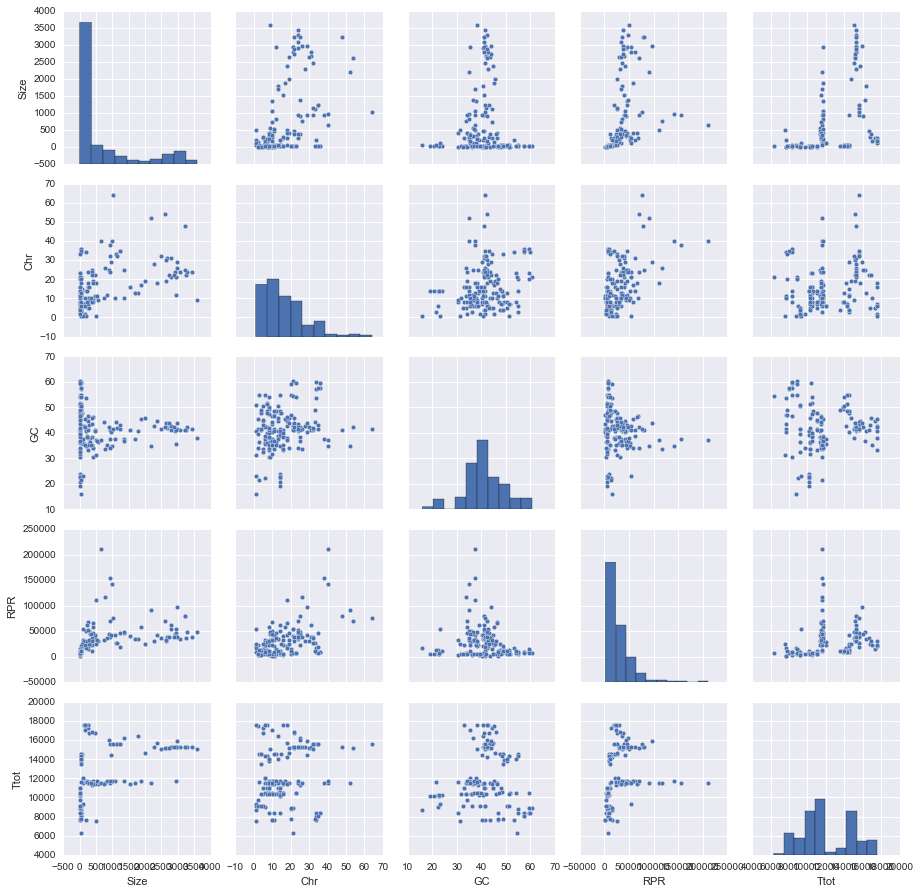

In [71]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df_subO_EP2_[['Size','Chr','GC','RPR','Ttot']])

#sns.pairplot(df_subO_EP_[[c for c in df_subO_EP_.columns if c not in ['Organism','Unnamed: 0','Classes','ott_id','url','Kingdom','Ttot']]]) #, hue=Size)

In [206]:
from scrapy.selector import Selector
from scrapy.http import HtmlResponse

import pandas as pd

In [207]:
def branchlength(species1, species2):
    p_species1 = species1.replace(" ", "%20")
    p_species2 = species2.replace(" ", "%20")
    url = 'http://www.timetree.org/search/pairwise/'
    url_gc = str(url) + p_species1+'/'+p_species2

    response = requests.get(url_gc)
    HTML = response.text

    #print "URL: ", i

    site_all = "//div[@id='timetreetimeline']/span[@class='timetreeapp']/span[@class='timetreeapp-info']/span[@class='time'][1]/text()"

    try:
        for_page = Selector(text=HTML).xpath(site_all)
        page_tot = for_page.extract()        

        gc = page_tot
    except:
        gc = ''
    return gc

# p_species1 = "Ananas comosus"
# p_species2 = "Anolis carolinensis"

# branchlength(p_species1, p_species2)

[u'1513.9 Million Years Ago (', u')']

In [74]:
class_p = 'Opisthokonta'

df_subO_EP2_ = df_subO_EP1_
df_subO_EP2_[class_p] = 0

df_subO_EP2_[class_p] = df_subO_EP2_['Classes'].map(lambda x: 1 if (class_p in str(x)) else 0)
df_subO_EP2_.head(5)

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Organism    Kingdom   Chr            url       GC      RPR  \
0        Ananas comosus  Eukaryota  25.0  /genome/13945  38.5375  23598.0   
1   Anolis carolinensis  Eukaryota  13.0    /genome/708  40.8238  34827.0   
2     Anopheles gambiae  Eukaryota   5.0     /genome/46  44.5000  14099.0   
3        Apis mellifera  Eukaryota  16.0     /genome/48  33.1169  22456.0   
4  Arabidopsis thaliana  Eukaryota   6.0      /genome/4  36.6000  33107.0   

       Size     Ttot  Opisthokonta  \
0   381.896  11314.0             0   
1  1799.140  16381.0             1   
2   265.027  17290.0             1   
3   250.287  17591.0             1   
4   119.668  11549.0             0   

                                             Classes  
0  [Poales, commelinids, Liliopsida, basal Magnol...  
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...  
2  [Cellia, Anophelinae, Anopheles, Chaoboridae, ...  
3  [Apis, Apinae, Apidae, Sphecoidea, Apoidea, Ve...  
4  [Arabidopsis, Camelineae, Brassicaceae, Brassi...

In [81]:
for i in df_subO_EP2_.ix[[1],9]:
    print i

[u'Anolis', u'Polychrotinae', u'Iguanidae', u'Iguania', u'Toxicofera', u'Episquamata', u'Unidentata', u'Bifurcata', u'Squamata', u'Lepidosauria', u'Sauria', u'Amniota', u'Tetrapoda', u'Sarcopterygii', u'Euteleostomi', u'Gnathostomata', u'Vertebrata', u'Chordata', u'Deuterostomia', u'Bilateria', u'Metazoa', u'Eumetazoa', u'Opisthokonta', u'Eukaryota', u'cellular organisms']


In [8]:
# ###############################################
# ################   PROTEIN ####################
# ###############################################

# from scrapy.selector import Selector
# from scrapy.http import HtmlResponse

# import pandas as pd

# #From url, Summary page, get GC%
# import numpy as np
# import time

# # keep stopping at 6899 ##ERRORS OUT 7279, 6899
# start_z = 0 #6800 #6900 #Skip 6899
# stop_z = len(df_subO_EP_)  #6899 #7000 #
# group_z = len(df_subO_EP_)   #99  #100

# start_p = start_z
# stop_p = start_p + group_z

# for k in range(start_z+1, stop_z, group_z):


#     url_list = df_subO_EP_['url']
#     gc_list = []

#     print len(url_list)

#     for i,j in enumerate(url_list[start_p:stop_p]): #For each page, get Grouping Info for each Organism

#         print "URL: ", j
        
#         url_a = j
#         url_gc = 'http://www.ncbi.nlm.nih.gov'+ str(url_a) #http://www.ncbi.nlm.nih.gov/genome/35822
#         response = requests.get(url_gc)
#         HTML = response.text

#         site_all = "//table[@class='summary']//tr//td//text()"

#         for_page = Selector(text=HTML).xpath(site_all)
#         page_tot = for_page.extract()
        
#         #search for "protein" 
        
#         m_i = 0
#         protein = ''
        
#         for m,n in enumerate(page_tot):
#             #print n, str("protein" in n )
#             if "protein" in n:
#                 if n[-1] == ' ':
#                     m_i = m + 1
#                     protein = page_tot[m_i]
#                 else:
#                     m_i = m
#                     protein = page_tot[m_i][22:]
#         gc = protein
#         #gc = float(gc)
        
# #         try:
# #             gc = page_tot[-2] #[-2] #last element is string list

# #             if "median" in gc:
# #                  gc = gc[22:] #last element, string take off "0GC%:"    
# #             else:
# #                 site_all = "//table[@class='summary']//tr//td/a/text()"
# #                 for_page = Selector(text=HTML).xpath(site_all)
# #                 page_tot = for_page.extract()
# #                 gc = page_tot[] #[10:] #last element, string take off "0GC%:" 
# #             #gc = float(gc)

# #         except:
# #             gc = np.nan
            
#         #gc = page_tot[-2]

#         print (time.strftime("%H:%M:%S"))
#         print i, " : ", url_a, " : ", gc
#         gc_list.append(gc)

#     print gc_list

#     file_gc = './out_pr_Z2_' + str(stop_p-1) + '.csv'

#     gc_df = pd.DataFrame(gc_list)
#     gc_df.to_csv(file_gc, if_exists="append", encoding='utf-8') #df.to_csv(if_exists="append")
    
#     start_p = start_p + group_z
#     stop_p = stop_p + group_z

Organism    Kingdom      Size   Chr       GC            url  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  /genome/13945   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238    /genome/708   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000     /genome/46   

                                             Classes    PR  
0  -Ananas comosus-Ananas-Bromeliaceae-Poales-com...  38.5  
1  -Anolis carolinensis-Anolis-Polychrotinae-Igua...  40.4  
2  -Anopheles gambiae-gambiae species complex-Pyr...  44.3

In [82]:
# from scrapy.selector import Selector
# from scrapy.http import HtmlResponse

# import pandas as pd

# #From url, Summary page, get GC%
# import numpy as np
# import time

# # keep stopping at 6899 ##ERRORS OUT 7279, 6899
# start_z = 0 #6800 #6900 #Skip 6899
# stop_z = len(df_subO_EP_)  #6899 #7000 #
# group_z = len(df_subO_EP_)   #99  #100

# start_p = start_z
# stop_p = start_p + group_z

# for k in range(start_z+1, stop_z, group_z):


#     url_list = df_subO_EP_['url']
#     gc_list = []

#     print len(url_list)

#     for i,j in enumerate(url_list[start_p:stop_p]): #For each page, get Grouping Info for each Organism

#         print "URL: ", j
        
#         url_a = j
#         url_gc = 'http://www.ncbi.nlm.nih.gov'+ str(url_a) #http://www.ncbi.nlm.nih.gov/genome/35822
#         response = requests.get(url_gc)
#         HTML = response.text

#         site_all = "//table[@class='summary']//tr//td//text()"

#         for_page = Selector(text=HTML).xpath(site_all)
#         page_tot = for_page.extract()
        
#         #search for "protein" 
        
#         m_i = 0
#         protein = ''
        
#         for m,n in enumerate(page_tot):
#             #print n, str("protein" in n )
#             if "protein" in n:
#                 if n[-1] == ' ':
#                     m_i = m + 1
#                     protein = page_tot[m_i]
#                 else:
#                     m_i = m
#                     protein = page_tot[m_i][22:]
#         gc = protein
#         #gc = float(gc)
        
# #         try:
# #             gc = page_tot[-2] #[-2] #last element is string list

# #             if "median" in gc:
# #                  gc = gc[22:] #last element, string take off "0GC%:"    
# #             else:
# #                 site_all = "//table[@class='summary']//tr//td/a/text()"
# #                 for_page = Selector(text=HTML).xpath(site_all)
# #                 page_tot = for_page.extract()
# #                 gc = page_tot[] #[10:] #last element, string take off "0GC%:" 
# #             #gc = float(gc)

# #         except:
# #             gc = np.nan
            
#         #gc = page_tot[-2]

#         print (time.strftime("%H:%M:%S"))
#         print i, " : ", url_a, " : ", gc
#         gc_list.append(gc)

#     print gc_list

#     file_gc = './out_pr_Z2_' + str(stop_p-1) + '.csv'

#     gc_df = pd.DataFrame(gc_list)
#     gc_df.to_csv(file_gc, if_exists="append", encoding='utf-8') #df.to_csv(if_exists="append")
    
#     start_p = start_p + group_z
#     stop_p = stop_p + group_z



In [83]:
df_subO_EP2_.head(3)

Organism    Kingdom   Chr            url       GC      RPR  \
0       Ananas comosus  Eukaryota  25.0  /genome/13945  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  13.0    /genome/708  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   5.0     /genome/46  44.5000  14099.0   

       Size     Ttot  Opisthokonta  \
0   381.896  11314.0             0   
1  1799.140  16381.0             1   
2   265.027  17290.0             1   

                                             Classes  
0  [Poales, commelinids, Liliopsida, basal Magnol...  
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...  
2  [Cellia, Anophelinae, Anopheles, Chaoboridae, ...

NameError: name 'df_subO_EP2_' is not defined

In [86]:
# Loop through classifications:
df_subO_E_C1 = pd.DataFrame()
df_subO_E_C1[['Size', 'Chr', 'GC', 'RPR', 'Ttot', class_p]]= df_subO_EP2_[['Size', 'Chr', 'GC', 'RPR', 'Ttot', class_p]]

In [87]:
df_subO_E_C1.head(3)

Size   Chr       GC      RPR     Ttot  Opisthokonta
0   381.896  25.0  38.5375  23598.0  11314.0             0
1  1799.140  13.0  40.8238  34827.0  16381.0             1
2   265.027   5.0  44.5000  14099.0  17290.0             1

In [89]:
print df_subO_E_C1.isnull().sum()

Size             0
Chr              0
GC               0
RPR             26
Ttot             0
Opisthokonta     0
dtype: int64


In [90]:
df_subO_E_C1 =  df_subO_E_C1.dropna()

In [91]:
import seaborn as sns
%matplotlib inline

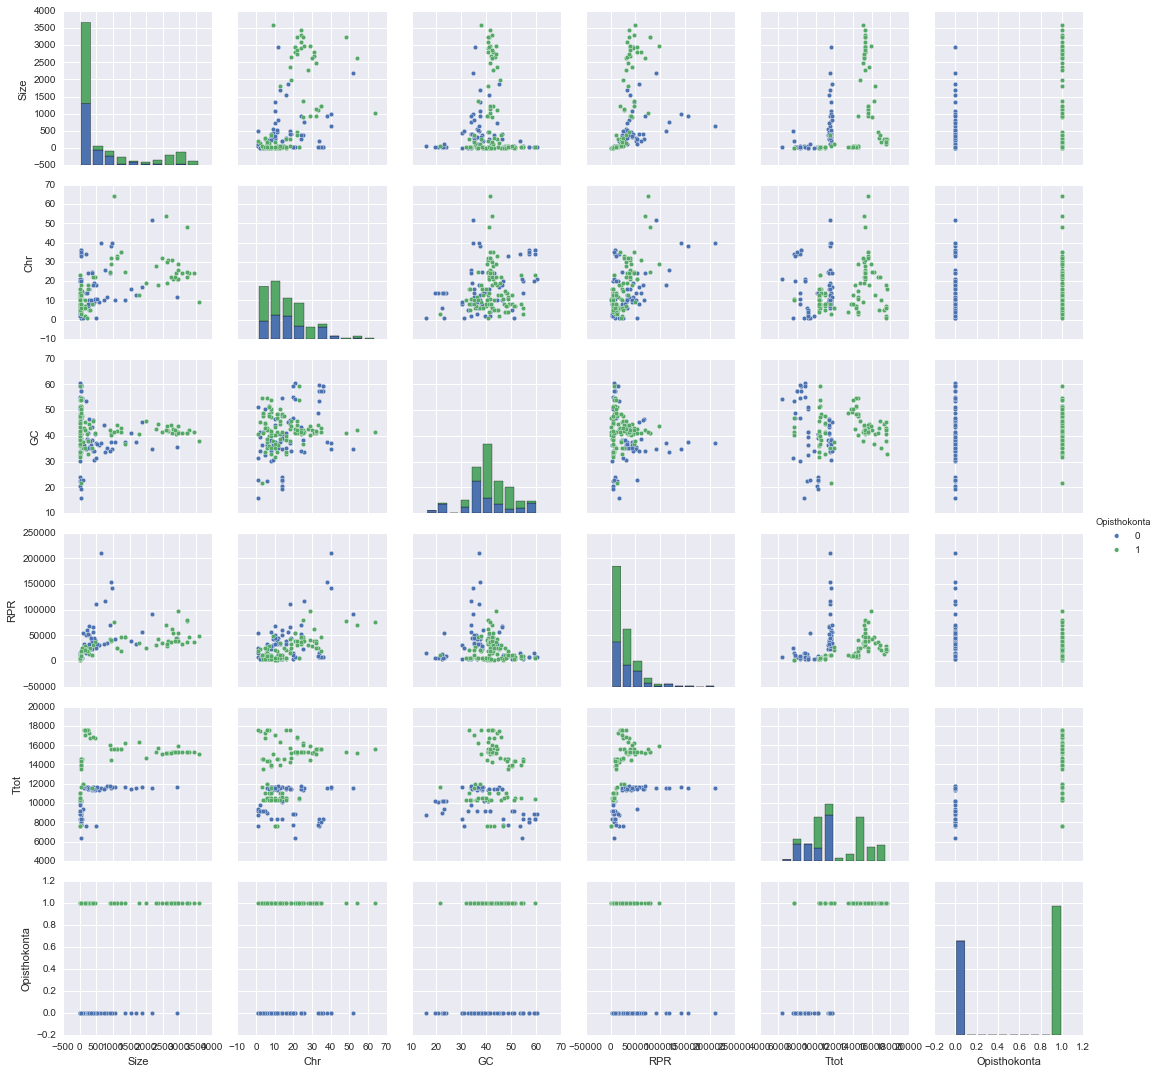

In [92]:

sns.pairplot(df_subO_E_C1[[c for c in df_subO_E_C1.columns if c not in ['Organism']]], hue=class_p)

In [93]:
#Correlation Matrix

#coefs = df_sub[df_sub.columns[1:9]].corr()
coefs= df_subO_E_C1.corr()
coefs

Size       Chr        GC       RPR      Ttot  Opisthokonta
Size          1.000000  0.465110 -0.047739  0.473572  0.518987      0.231191
Chr           0.465110  1.000000  0.203846  0.496805  0.164950     -0.008920
GC           -0.047739  0.203846  1.000000 -0.175606  0.015065      0.186744
RPR           0.473572  0.496805 -0.175606  1.000000  0.299407     -0.181838
Ttot          0.518987  0.164950  0.015065  0.299407  1.000000      0.583356
Opisthokonta  0.231191 -0.008920  0.186744 -0.181838  0.583356      1.000000

In [95]:
# Logistic Regression on Kingdom for Classification Eukaryotes

df_C1 = df_subO_E_C1[["Size","Chr","GC", "RPR", "Ttot", class_p]]

Y = df_subO_E_C1[class_p] #target

#Xcolumns = ["Size", "Chr", "GC", "RPR", "Ttot"] #predictors

In [96]:
#Patsy
# Use some string adding and joining to make the simple model formula:
formula_c = 'Opisthokonta ~ Size + Chr + GC + RPR + Ttot - 1' #CONCATENATE AUTOMATICALLY
formula_c = str(formula_c)

In [97]:
from patsy import dmatrices

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [98]:
###NORMALIZE THE PREDICTOR VARIABLES!

Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

Xb_mat = Xb

In [99]:
logreg = LogisticRegression()

#fit a model on the training data and test on the testing data
model = logreg.fit(Xb_mat, Yb)
# print model
predictions = logreg.predict(Xb_mat)

# print "Score:", model.score(Xb_mat, Yb)     
print accuracy_score(Yb, predictions)

0.820809248555


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
t = logreg.coef_
tt = t.reshape(-1)

house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": tt})

print house_coefs #Strong Pos Correlation to Sex, and Strong Neg Correlation to Age

       coef feature
0  0.001652    Size
1  0.018308     Chr
2 -0.074847      GC
3 -0.000107     RPR
4  0.000432    Ttot


Interesting! Instead of Size:Chr relationship, Size:GC correlation to classification, Maybe I'll add as a feature

In [102]:
# Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them
# Use some string adding and joining to make the simple model formula:
formula_c2 = 'Opisthokonta ~ (Size + Chr + GC + RPR + Ttot)**2 - 1' #CONCATENATE AUTOMATICALLY
formula_c2 = str(formula_c2)

print formula_c2

Yb2, Xb2 = dmatrices(formula_c2, data = df_C1, return_type='dataframe')
Xb2_mat = ((Xb2 - Xb2.mean())/ Xb2.std()).values

#fit a model on the training data and test on the testing data
model2 = logreg.fit(Xb2_mat, Yb2)
# print model
predictions2 = logreg.predict(Xb2_mat)

# print "Score:", model.score(Xb_mat, Yb)     
print accuracy_score(Yb2, predictions2)

t = logreg.coef_
tt = t.reshape(-1)

house_coefs = pd.DataFrame({'feature': Xb2.columns, "coef": tt})
house_coefs['coef_ab'] = abs(house_coefs['coef'])
house_coefs = house_coefs.sort_values(['coef_ab'], ascending=False)
print house_coefs

Opisthokonta ~ (Size + Chr + GC + RPR + Ttot)**2 - 1
0.924855491329
        coef    feature   coef_ab
4   1.789536       Ttot  1.789536
3  -1.707413        RPR  1.707413
12 -1.629978     GC:RPR  1.629978
13  1.545089    GC:Ttot  1.545089
7   0.930692   Size:RPR  0.930692
11  0.874648   Chr:Ttot  0.874648
5   0.828415   Size:Chr  0.828415
9  -0.579398     Chr:GC  0.579398
0  -0.524549       Size  0.524549
14 -0.503448   RPR:Ttot  0.503448
1  -0.379852        Chr  0.379852
10  0.317424    Chr:RPR  0.317424
8   0.306557  Size:Ttot  0.306557
6  -0.261905    Size:GC  0.261905
2  -0.100619         GC  0.100619


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
## week 7- hierarchical clustering?
## Too much overlap in features for KNN or K Means Clustering, week 7 1.1

## week7-3.2 hierarchical clustering should work on 

## Think it's better to do Decision Tree... because of overlap, week 6 1.1 Intro to CART

import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

from ipywidgets import *
from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set_style('whitegrid')

%matplotlib inline



In [104]:
df_C1.columns

Index([u'Size', u'Chr', u'GC', u'RPR', u'Ttot', u'Opisthokonta'], dtype='object')

In [105]:
df_C1.shape

(173, 6)

<function r2_score at 0x12d34d6e0>
Best score: 0.119206446807
Best depth: 6


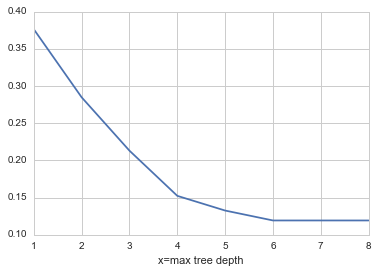

In [106]:
# DECISION TREE MODELING: 1.2 CART-solution-code

x = df_C1.drop(class_p, axis = 1)
y = df_C1[class_p]

# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train = x
X_test = x
y_train = y
y_test = y


# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=42, max_depth=5)
treereg.fit(X_train, y_train)




# make predictions
preds = treereg.predict(X_test)



from sklearn.metrics import r2_score
r2_score(y_test, preds)
print r2_score

# use cross-validation to find best max_depth
from sklearn.cross_validation import cross_val_score

all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 9):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, x, y, cv=8, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(x, y)

plt.figure()
plt.plot(range(1, 9), all_scores)
plt.xlabel('x=max tree depth')

In [107]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':x.columns, 'importance':treereg.feature_importances_})


feature  importance
0    Size    0.270768
1     Chr    0.012967
2      GC    0.000000
3     RPR    0.036915
4    Ttot    0.679350

In [108]:
df_C1[class_p].value_counts()

1    100
0     73
Name: Opisthokonta, dtype: int64

In [109]:
baseline = 1.0*100/(100+73)*1.0
baseline

0.5780346820809249

In [110]:
# print predictions and actual values

#Make DF for Classification plotting of errors
df_C1_TEST = pd.DataFrame()
df_C1_TEST = X_test
df_C1_TEST[class_p] = y_test
df_C1_TEST['predicted'] = preds
df_C1_TEST['predict_r'] = np.rint(preds)
df_C1_TEST['Organism'] = df_subO_EP_['Organism']
df_C1_TEST['Classes'] = df_subO_EP_['Classes']

def checkerrs(series):
    a = "T"
    if series[class_p] == series['predict_r']:
        a = "T"
    elif series[class_p] == 1:
        a = "FN"
    elif series[class_p] == 0:
        a = "FP"
    return a

df_C1_TEST['errors'] = df_C1_TEST.apply(checkerrs, axis=1)


In [114]:
#Make DF for Classification plotting of errors
df_C1_TEST = pd.DataFrame()
df_C1_TEST = X_test
df_C1_TEST[class_p] = y_test
df_C1_TEST['predicted'] = preds
df_C1_TEST['predict_r'] = np.rint(preds)
df_C1_TEST['Organism'] = df_subO_EP_['Organism']
df_C1_TEST['Classes'] = df_subO_EP_['Classes']

In [115]:
df_C1_TEST

Size   Chr       GC       RPR     Ttot  Opisthokonta  predicted  \
0     381.89600  25.0  38.5375   23598.0  11314.0             0        0.0   
1    1799.14000  13.0  40.8238   34827.0  16381.0             1        1.0   
2     265.02700   5.0  44.5000   14099.0  17290.0             1        1.0   
3     250.28700  16.0  33.1169   22456.0  17591.0             1        1.0   
4     119.66800   6.0  36.6000   33107.0  11549.0             0        0.0   
5     308.03300   8.0  37.9325   23286.0  11565.0             0        0.0   
6    1068.35000  10.0  37.4869   42562.0  11685.0             0        0.0   
7    1349.06000  10.0  37.7351   46410.0  11685.0             0        0.0   
8      29.38500   8.0  49.4000    9585.0  13885.0             1        1.0   
9      30.24270   8.0  50.3350   10037.0  13830.0             1        1.0   
10     13.84090   5.0  50.6069    5079.0   9149.0             0        0.0   
11      8.17971   2.0  41.6127    3706.0   9149.0             0        0.0   
12      6.39244   3.0  36.3000    3492.0   9149.0             0        0.0   
13    566.56700   9.0  36.4500   31282.0  11365.0             0        0.0   
14    248.65400  18.0  38.0986   20321.0  17542.0             1        1.0   
16   2670.14000  31.0  41.8776   39053.0  15188.0             1        1.0   
17     42.74380  18.0  42.5000   16353.0  14227.0             1        1.0   
18    272.13300  10.0  46.4377   67788.0  11470.0             0        0.0   
19    930.50800  38.0  37.6116  154923.0  11551.0             0        0.0   
20    488.95400  18.0  37.2377  111121.0  11551.0             0        0.0   
21    284.12900  10.0  35.8260   51005.0  11551.0             0        0.0   
22    108.38400   6.0  37.6966   21959.0  11984.0             1        1.0   
23    100.28600   6.0  35.4659   28026.0  11984.0             1        1.0   
24   2914.96000  24.0  40.8000   44212.0  15250.0             1        1.0   
25    641.35600  40.0  37.2559  210715.0  11534.0             0        0.0   
26     27.55890   5.0  33.7000    6276.0  10314.0             1        1.0   
27     14.61840   8.0  33.1000    5860.0  10999.0             1        1.0   
28     12.33830  13.0  38.6000    5293.0  10496.0             1        1.0   
30   2635.85000  30.0  42.1792   30164.0  15204.0             1        1.0   
31   2935.88000  12.0  35.5000   45410.0  11683.0             0        0.0   
..          ...   ...      ...       ...      ...           ...        ...   
173     8.89452   7.0  51.1789    4487.0  10314.0             1        1.0   
174  2966.89000  29.0  43.8912   97738.0  15927.0             1        1.0   
175    15.44120   8.0  41.1620    7092.0  10999.0             1        1.0   
176   364.53800   8.0  35.2373   11787.0  11547.0             1        1.0   
179   275.05900  16.0  35.1120   33093.0  11519.0             0        0.0   
180   405.86800  18.0  46.2205   65688.0  11457.0             0        0.0   
181   823.78600  12.0  35.1048   36149.0  11723.0             0        0.0   
182   926.42600  24.0  34.0000   70136.0  11725.0             0        0.0   
183   739.15000  10.0  44.2547   33005.0  11457.0             0        0.0   
184    18.47690  23.0  59.5059    6673.0  10428.0             1        1.0   
186    43.15020   3.0  21.5777   12450.0  11638.0             1        1.0   
187    15.98210   5.0  44.8770    5135.0  10999.0             1        1.0   
188  1232.14000  35.0  41.4526   19447.0  15616.0             1        1.0   
189   391.48500  22.0  45.8414   31052.0  16871.0             1        1.0   
190   103.01400   1.0  23.0000   53992.0   9340.0             0        0.0   
191    14.04860  10.0  31.7378    5388.0  10314.0             1        1.0   
192    12.11510  16.0  33.5732    5253.0  10314.0             1        1.0   
193    32.43740  20.0  46.9050   11673.0   7747.0             0        0.0   
194     8.35843   5.0  32.6263    4950.0   9149.0             0        0.0   
195    11.67450   2.0  39.4681   

In [111]:
df_C1_TEST['errors'].value_counts()

T    173
Name: errors, dtype: int64

In [112]:
#NOT BAD! only 1 False Negative! what characteristics does it have?

df_C1_TEST[df_C1_TEST['errors']!= 'T']

Empty DataFrame
Columns: [Size, Chr, GC, RPR, Ttot, Opisthokonta, predicted, predict_r, Organism, Classes, errors]
Index: []

In [113]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()  
export_graphviz(treereg, out_file=dot_data,  
                feature_names=x.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

### ORANGE IS EUKARYOTA - only 80 samples are Eukaryota
### IF Size > 12 & GC < 64% then Eukaryota
### IF Size > 2 & Chromosomes > 6 then Eukaryota, But one Eukaryota with Chr 3 false negative

In [4]:
### TRY MAKE PHYLOGENIC TREE FROM DISTANCES, and Classifications...
## Start from Newest/Youngest Species

df_subO_EP3_ = pd.read_csv('./out_subO_EP2A_v3.csv')
df_subO_EP3_ = df_subO_EP3_.ix[:,1:]


print len(df_subO_EP3_)
df_subO_EP3_.head(2)



199


Organism    Kingdom   Chr            url       GC      RPR  \
0       Ananas comosus  Eukaryota  25.0  /genome/13945  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  13.0    /genome/708  40.8238  34827.0   

       Size     Ttot  Opisthokonta  \
0   381.896  11314.0             0   
1  1799.140  16381.0             1   

                                             Classes  \
0  [Poales, commelinids, Liliopsida, basal Magnol...   
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...   

                                            ClassesT  
0  [109, 120, 139, 171, 188, 318, 405, 432, 552, ...  
1  [48, 99, 120, 163, 172, 182, 188, 200, 212, 25...

In [33]:
df_classes = pd.read_csv("./OE_Classes_Z.csv") #FROM MAP REDUCE, WORD COUNT
df_classes = df_classes.ix[:,1:] 
df_classes = df_classes.sort_values(['Count'], ascending=[True])
df_classes = df_classes.reset_index(drop=True)
print len(df_classes)
print df_classes.head(3)

#classes_list = []
classes_list = df_classes['Classes'].map(lambda x: x.encode('utf-8'))
print classes_list

36
             Classes  Count
0  Oligohymenophorea    2.0
1   Mus subgenus Mus    2.0
2         Malvoideae    3.0
0        Oligohymenophorea
1         Mus subgenus Mus
2               Malvoideae
3                 Bacteria
4                Hominidae
5          Acanthomorphata
6               Eremoneura
7                   Sauria
8              Brassicales
9            Kinetoplastea
10                  fabids
11                 Insecta
12               Ecdysozoa
13             Protostomia
14                 Poaceae
15            Leotiomyceta
16        Euarchontoglires
17           Petrosaviidae
18      Saccharomycetaceae
19             Apicomplexa
20               Alveolata
21                  rosids
22                  Theria
23                Mammalia
24       Saccharomycetales
25          eudicotyledons
26    Dipnotetrapodomorpha
27              Teleostomi
28           Euphyllophyta
29          Chloroplastida
30          Archaeplastida
31        Division=Dikarya
32               Eume

In [34]:
def df_string_list(str_p):
    
#str_p = df_subO_EP3_['Classes'][0][1:]
    str_p = str_p.replace('[','')
    str_p = str_p.replace(']','')

    strs = str_p.split(', ')
    return strs

def df_string_listB(str_p):
    try:
        strs = str_p.split('-')
    except:
        strs = ''
    return strs

In [14]:
df_subO_EP3_.head(3)

Organism    Kingdom   Chr            url       GC      RPR  \
0       Ananas comosus  Eukaryota  25.0  /genome/13945  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  13.0    /genome/708  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   5.0     /genome/46  44.5000  14099.0   

       Size     Ttot  Opisthokonta  \
0   381.896  11314.0             0   
1  1799.140  16381.0             1   
2   265.027  17290.0             1   

                                             Classes  \
0  [[Poales, commelinids, Liliopsida, basal Magno...   
1  [[Anolis, Polychrotinae, Iguanidae, Iguania, T...   
2  [[Cellia, Anophelinae, Anopheles, Chaoboridae,...   

                                            ClassesT Classsub  
0  [109, 120, 139, 171, 188, 318, 405, 432, 552, ...           
1  [48, 99, 120, 163, 172, 182, 188, 200, 212, 25...           
2  [57, 67, 67, 164, 164, 190, 234, 247, 254, 395...

In [35]:
# Unicode to string text, 
# df_subO_EP3_['Classes'] = df_subO_EP3_.Classes.map(lambda x: df_string_list(x))
# df_subO_EP3_['ClassesT'] = df_subO_EP3_.ClassesT.map(lambda x: df_string_list(x))
#df_subO_EP1A_['Classes'] = df_subO_EP1A_.Classes.map(lambda x: str(x))

#df_subO_EP1A_ = df_subO_EP3_

df_subO_EP3B_['Classes'] = df_subO_EP3B_.Classes.map(lambda x: df_string_listB(x))
#df_subO_EP1A_['Classes'][0].split('-')

In [240]:
species_n = len(df_subO_EP3_)
classes_p = []

df_subO_EP3B_['Classes'] = df_subO_EP3B_.Classes.map(lambda x: df_string_listB(x))

for i,j in enumerate(df_subO_EP3B_['Organism']):
    m = ''
    for k,l in enumerate(df_subO_EP3B_['Classes'][i]):
        #print df_subO_EP1A_['Classes'][i][k]
        #print classes_list
        if df_subO_EP3B_['Classes'][i][k] in classes_list.tolist():
            m = df_subO_EP3B_['Classes'][i][k]
            #print m
            break
    classes_p.append(m)
    print m, " ",i

print df_subO_EP3B_['Classes'][0]
print classes_list.tolist()
    
 

   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
   10
   11
   12
   13
   14


KeyError: 15

In [37]:
df_subO_EP3B_['Classsub'] = classes_p
df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR     Ttot  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0  11314.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0  16381.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0  17290.0   

                                             Classes       Classsub  
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  Petrosaviidae  
1  [, Anolis carolinensis, Anolis, Polychrotinae,...         Sauria  
2  [, Anopheles gambiae, gambiae species complex,...        Insecta

In [ ]:
df_subO_EP3B_.head(3)

In [330]:
df_subO_EP1A_['Classsub'].value_counts()

Apicomplexa           20
Saccharomycetaceae    19
Leotiomyceta          16
Poaceae               15
fabids                11
Euarchontoglires      10
Kinetoplastea         10
Brassicales            9
Saccharomycetales      9
Theria                 9
Sauria                 8
Eremoneura             7
Division=Dikarya       7
Acanthomorphata        6
Eukaryota              5
Insecta                5
                       5
Hominidae              5
eudicotyledons         4
Bacteria               4
Teleostomi             4
Malvoideae             3
Petrosaviidae          3
Mus subgenus Mus       2
Oligohymenophorea      2
Chloroplastida         2
rosids                 2
Protostomia            1
Alveolata              1
Ecdysozoa              1
Mammalia               1
Archaeplastida         1
Name: Classsub, dtype: int64

In [37]:
######START OVER FROM EXPORTS######

In [38]:
import pandas as pd

df_subO_E_= pd.read_csv('./out_subO_E.csv', encoding='utf-8')
len(df_subO_E_)

df_real_PR = pd.read_csv('./out_pr_Z2_206.csv')
len(df_real_PR)

# MERGE GC, PR Data

df_subO_EP_  = pd.DataFrame()

df_subO_EP_ = df_subO_E_
df_subO_EP_['RPR'] = df_real_PR['0']
df_subO_EP_.head(3)

df_subO_EP1_ = pd.DataFrame()
df_subO_EP1_[['Organism', 'Kingdom','Chr','url','GC','RPR','Size','Classes']] = df_subO_EP_[['Organism', 'Kingdom','Chr','url','GC','RPR','Size', 'Classes']]

df_subO_EP1A_ = df_subO_EP1_

df_subO_EP1A_.head(3)


Organism    Kingdom   Chr            url       GC      RPR  \
0       Ananas comosus  Eukaryota  25.0  /genome/13945  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  13.0    /genome/708  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   5.0     /genome/46  44.5000  14099.0   

       Size                                            Classes  
0   381.896  -Ananas comosus-Ananas-Bromeliaceae-Poales-com...  
1  1799.140  -Anolis carolinensis-Anolis-Polychrotinae-Igua...  
2   265.027  -Anopheles gambiae-gambiae species complex-Pyr...

In [39]:
df_subO_EP3_ = pd.read_csv('./out_subO_EP2A_v3.csv')
df_subO_EP3_ = df_subO_EP3_.ix[:,1:]


print len(df_subO_EP3_)
df_subO_EP3_.head(2)


199


Organism    Kingdom   Chr            url       GC      RPR  \
0       Ananas comosus  Eukaryota  25.0  /genome/13945  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  13.0    /genome/708  40.8238  34827.0   

       Size     Ttot  Opisthokonta  \
0   381.896  11314.0             0   
1  1799.140  16381.0             1   

                                             Classes  \
0  [Poales, commelinids, Liliopsida, basal Magnol...   
1  [Anolis, Polychrotinae, Iguanidae, Iguania, To...   

                                            ClassesT  
0  [109, 120, 139, 171, 188, 318, 405, 432, 552, ...  
1  [48, 99, 120, 163, 172, 182, 188, 200, 212, 25...

In [40]:
###############################
# FIX Ttot
###############################

df_subO_CHECK = pd.read_csv('./out_subO_EP2A_v4B.csv')
df_subO_fixT = pd.DataFrame()
df_subO_fixT[['Organism', 'Ttot']] = df_subO_CHECK[['Organism', 'ClassesT']]
print len(df_subO_fixT)

df_subO_fixT.head(3)

199


Organism  Ttot
0       Ananas comosus   109
1  Anolis carolinensis    48
2    Anopheles gambiae    57

In [41]:
################################
# Add another T for log, exponential, from time of origin...
# say 5000 MYA
###############################
import numpy as np

df_subO_fixT['expT0'] = np.exp((5000 - df_subO_fixT['Ttot'])/1000) #get it in reasonable scale

df_subO_fixT.head(3)

Organism  Ttot       expT0
0       Ananas comosus   109  133.086594
1  Anolis carolinensis    48  141.457596
2    Anopheles gambiae    57  140.190190

In [42]:

df_subO_EP3B_ = pd.merge(df_subO_EP3_[['Organism','Kingdom','Size','Chr','GC','RPR','Ttot']], df_subO_EP1A_[['Organism','Classes']],
                       how='left', on=['Organism'])

df_subO_EP3B_ = pd.merge(df_subO_EP3B_[['Organism','Kingdom','Size','Chr','GC','RPR', 'Classes']], df_subO_fixT[['Organism','Ttot', 'expT0']],
                       how='left', on=['Organism'])

df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes  Ttot       expT0  
0  -Ananas comosus-Ananas-Bromeliaceae-Poales-com...   109  133.086594  
1  -Anolis carolinensis-Anolis-Polychrotinae-Igua...    48  141.457596  
2  -Anopheles gambiae-gambiae species complex-Pyr...    57  140.190190

In [43]:
def df_string_list(str_p):
    
#str_p = df_subO_EP3_['Classes'][0][1:]
    str_p = str_p.replace('[','')
    str_p = str_p.replace(']','')

    strs = str_p.split(', ')
    return strs

def df_string_listB(str_p):
    try:
        strs = str_p.split('-')
    except:
        strs = ''
    return strs

df_subO_EP3B_['Classes'] = df_subO_EP3B_.Classes.map(lambda x: df_string_listB(x))

In [44]:
################ REDO CLASS COUNT#################
# Take all of the Classes, do value counts
class_count = []
for i in df_subO_EP3B_['Classes']:
    class_count.append(i)

class_count = [j for i in class_count for j in i] #get rid of nested list, pretty cool...
df_classesA = pd.DataFrame(class_count)
df_classesA.rename(columns={0: 'Classes'}, inplace=True)

df_classesB = pd.DataFrame(df_classesA['Classes'].value_counts())
df_classesB.head(10)
df_classesB = df_classesB[df_classesB['Classes'] > 1] #Mask for Classes with > 1 counts
df_classesB = df_classesB.reset_index(level=None) #Get rid of hierarchical index
df_classesB = df_classesB[df_classesB['index']!= ''] #Get rid of blank index
df_classesB = df_classesB.sort_values(['Classes'], ascending=True) #Resort counts ascending
df_classesB.rename(columns={'index': 'Names'}, inplace=True)
df_classesB['Names'] = df_classesB['Names'].map(lambda x: str(x))
df_classesB

classes_list = df_classesB['Names'].tolist()
classes_list 
#print 

['Bathycoccaceae',
 'Aspergillus',
 'Cryptococcus',
 'Tremellaceae',
 'Eucoccidiorida',
 'Trifolieae',
 'Apoidea',
 'Bovinae',
 'Leishmania braziliensis species complex',
 'Camelineae',
 'Eimeriorina',
 'Aculeata',
 'Kazachstania',
 'Bos',
 'Naumovozyma',
 'Oligohymenophorea',
 'Conthreep',
 'Panicoideae',
 'Mamiellales',
 'Tetrapisispora',
 'Dalbergieae',
 'pseudoobscura subgroup',
 'Percomorphaceae',
 'Bacillariophyta',
 'Ostreococcus',
 'Phaffomycetaceae',
 'Lachancea',
 'Eremothecium',
 'Tremellales',
 'Sordariales',
 'Tremellomycetes',
 'Mus subgenus Mus',
 'Fusarium',
 'Ctenosquamata',
 'Protacanthopterygii',
 'Kluyveromyces',
 'obscura group',
 'prasinophytes',
 'lamiids',
 'Mamiellophyceae',
 'Arachis',
 'Leishmania donovani species complex',
 'Pan',
 'Macaca',
 'Capra',
 'Ovis',
 'Candida',
 'Acanthomorphata',
 'Euacanthomorphacea',
 'Hymenostomatia',
 'Candida/Lodderomyces clade',
 'Mus',
 'Sporisorium',
 'Chlorophyta',
 'Bacillariophytina',
 'Deinococcus',
 'Alphaproteobacte

In [45]:
# #Doesn't look like the Map reduce worked....
# df_classes = pd.read_csv("./OE_Classes_Z.csv") #FROM MAP REDUCE, WORD COUNT
# df_classes = df_classes.ix[:,1:] 
# df_classes = df_classes.sort_values(['Count'], ascending=[True])
# df_classes = df_classes.reset_index(drop=True)
# print len(df_classes)
# print df_classes.head(3)

# #classes_list = []
# classes_list = df_classes['Classes'].map(lambda x: x.encode('utf-8'))
# print classes_list

In [46]:
species_n = len(df_subO_EP3_)
classes_p = []


for i,j in enumerate(df_subO_EP3B_['Organism']):
    m = ''
    for k,l in enumerate(df_subO_EP3B_['Classes'][i]):
        #print df_subO_EP1A_['Classes'][i][k]
        #print classes_list
        if df_subO_EP3B_['Classes'][i][k] in classes_list:
            m = df_subO_EP3B_['Classes'][i][k]
            #print m
            break
    classes_p.append(m)
    print m, " ",i

#print df_subO_EP3B_['Classes'][0]
#print classes_list.tolist()



Poales   0
Sauria   1
Diptera   2
Apidae   3
Camelineae   4
Brassicaceae   5
Arachis   6
Arachis   7
Aspergillus   8
Aspergillus   9
Babesia   10
Babesia   11
Babesia   12
Pentapetalae   13
Apidae   14
Bos   15
Bos   16
Sordariomyceta   17
BOP clade   18
Brassica   19
Brassica   20
Brassica   21
Ecdysozoa   22
Proteobacteria   23
Simiiformes   24
Camelineae   25
Candida   26
Candida   27
Saccharomycetaceae   28
Capra   29
Capra   30
Deinococcus   31
Brassicales   32
Cercopithecinae   33
Archelosauria   34
malvids   35
Phasianidae   36
Trypanosomatida   37
Cryptococcus   38
Cryptococcus   39
Conoidasida   40
fabids   41
Archaeplastida   42
Phaffomycetaceae   43
Percomorphaceae   44
Clupeocephala   45
asterids   46
Debaryomycetaceae   47
Eukaryota   48
Hypocreales   49
Drosophila   50
melanogaster subgroup   51
pseudoobscura subgroup   52
pseudoobscura subgroup   53
melanogaster subgroup   54
Drosophila   55
melanogaster subgroup   56
Stramenopiles   57
Eimeriorina   58
commelinids   59


In [47]:
df_subO_EP3B_['Classsub'] = classes_p
df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes  Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...   109  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...    48  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...    57  140.190190   

  Classsub  
0   Poales  
1   Sauria  
2  Diptera

In [48]:
# ### Get rid of non common nodes in classes_list

# #df_subO_EP3B_.ix[0]['Classes']

# def intersect(a, b):
#     return list(set(a) & set(b))

# intersect(df_subO_EP3B_.ix[0]['Classes'], classes_list)

In [49]:
species_n = len(df_subO_EP3_)
classes_p1 = []


for i,j in enumerate(df_subO_EP3B_['Organism']):
    m = []
    for k,l in enumerate(df_subO_EP3B_['Classes'][i]):
        if df_subO_EP3B_['Classes'][i][k] in classes_list:
            m.append(df_subO_EP3B_['Classes'][i][k])
    classes_p1.append(m)

#print classes_list.tolist()

In [50]:
df_subO_EP3B_['Classsub1'] = classes_p1
df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes  Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...   109  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...    48  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...    57  140.190190   

  Classsub                                          Classsub1  
0   Poales  [Poales, commelinids, Petrosaviidae, Liliopsid...  
1   Sauria  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...  
2  Diptera  [Diptera, Endopterygota, Neoptera, Pterygota, ...

In [51]:
################ REDO CLASS COUNT#################
# Take all of the Classes, do value counts
df_classesB.ix[1]
#df_subO_EP3B_.ix[0]['Classes']

Names      cellular organisms
Classes                   195
Name: 1, dtype: object

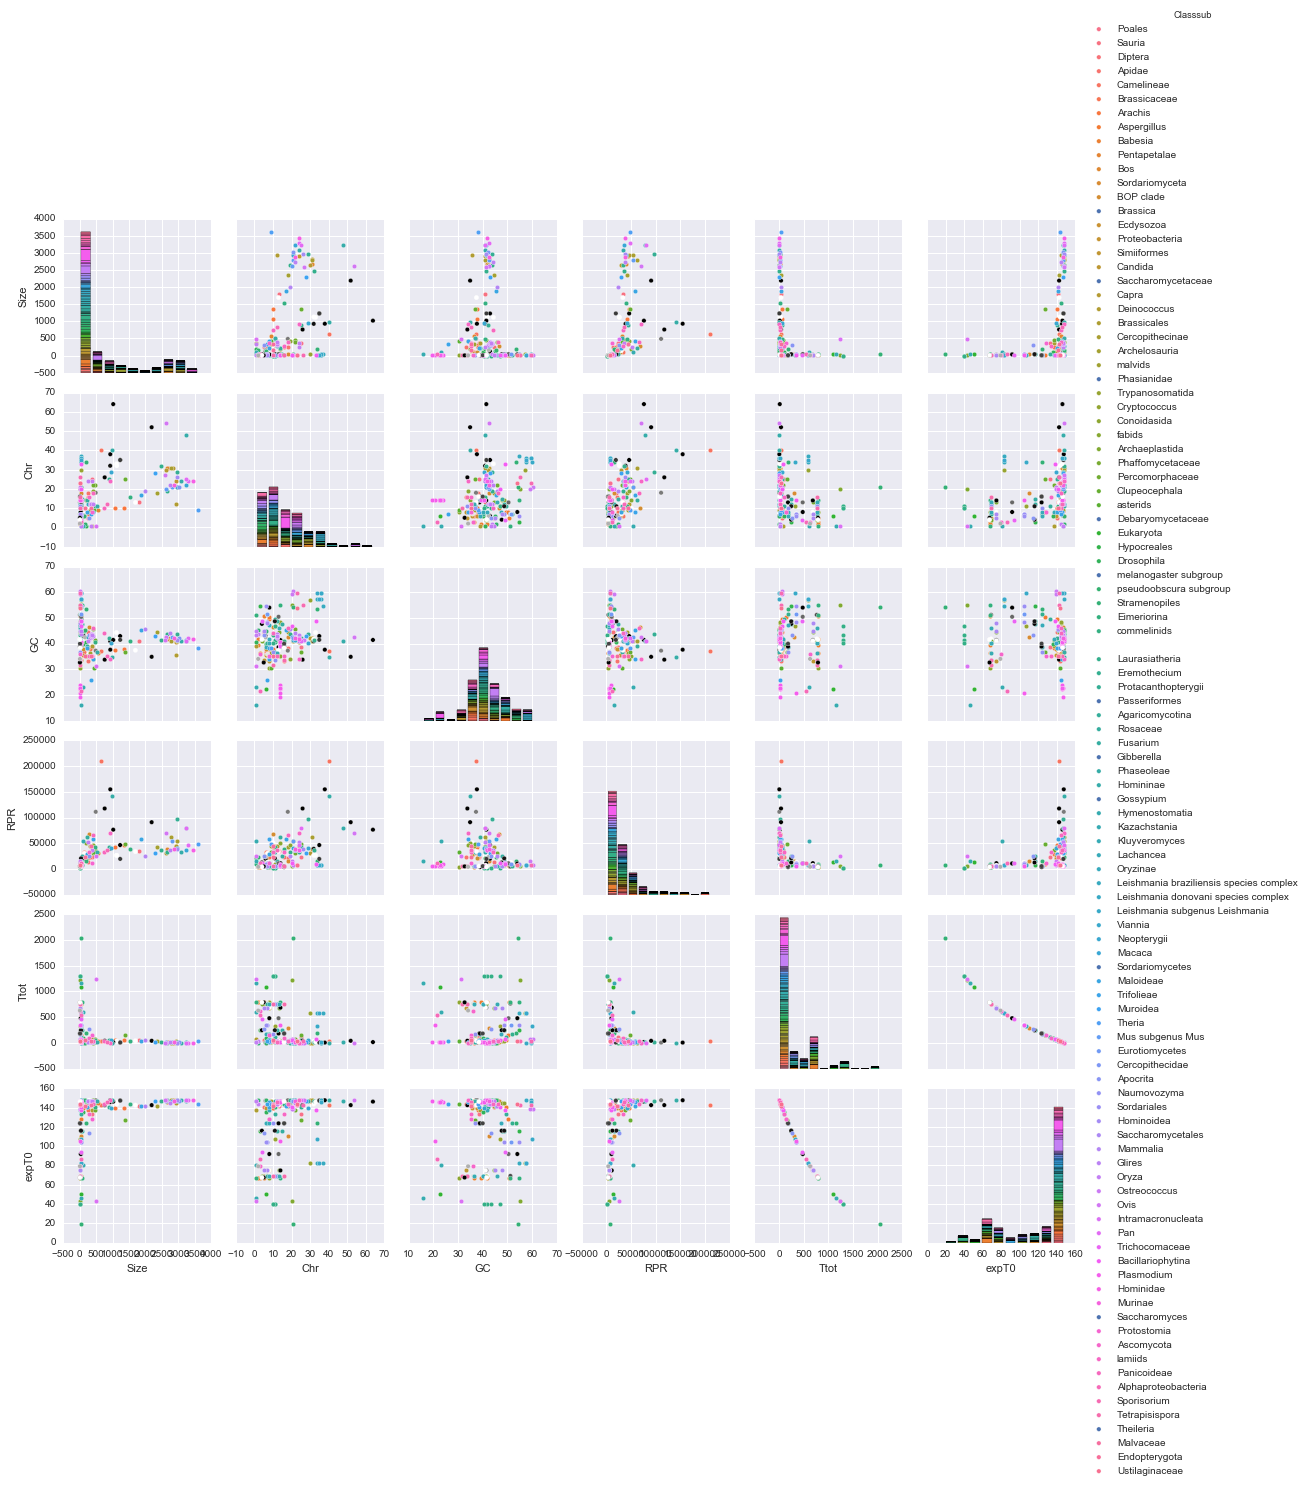

In [123]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df_subO_EP3B_[[c for c in df_subO_EP3B_.columns if c not in ['Organism','Kingdom','Classes']]], hue='Classsub')

               Organism    Kingdom    Size   Chr      GC     RPR  \
95  Leishmania donovani  Eukaryota  32.445  36.0  57.418  8032.0   

                                              Classes  Ttot      expT0  \
95  [, Leishmania donovani, Leishmania donovani sp...     1  148.26482   

                               Classsub  \
95  Leishmania donovani species complex   

                                            Classsub1  
95  [Leishmania donovani species complex, Leishman...  
                     Organism    Kingdom    Size   Chr    GC     RPR  \
115  Nannochloropsis gaditana  Eukaryota  33.987  21.0  54.4  7241.0   

                                               Classes  Ttot      expT0  \
115  [, Nannochloropsis gaditana, Nannochloropsis, ...  2041  19.278683   

          Classsub                                          Classsub1  
115  Stramenopiles  [Stramenopiles, SAR, Eukaryota, cellular organ...  


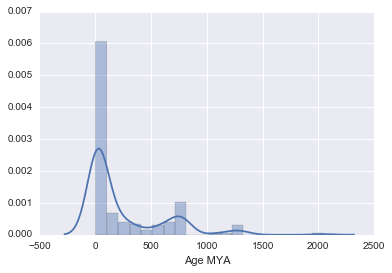

In [52]:
import seaborn as sns
%matplotlib inline

ages = df_subO_EP3B_['Ttot'] ### THE TIME DISTRIBUTION? HOW OLD ARE WE?

x = pd.Series(ages, name="Age MYA")
ax = sns.distplot(x, bins=20)

### Find minimum age:
df_Age_Sort = df_subO_EP3B_.sort_values(['Ttot'], ascending=True)
print df_Age_Sort.head(1) #Nannochloropsis gaditana: MARINE ALGAE
print df_Age_Sort.tail(1) #Nannochloropsis gaditana: EUROPEAN HONEY BEE


### TRY MULTINOMIAL LOGISTIC first?

In [53]:
df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes  Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...   109  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...    48  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...    57  140.190190   

  Classsub                                          Classsub1  
0   Poales  [Poales, commelinids, Petrosaviidae, Liliopsid...  
1   Sauria  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...  
2  Diptera  [Diptera, Endopterygota, Neoptera, Pterygota, ...

In [54]:
df_subO_EP3B_['Ttot']= df_subO_EP3B_['Ttot'].map(lambda x: float(x))
df_subO_EP3B_['Chr']= df_subO_EP3B_['Chr'].map(lambda x: float(x))
df_subO_EP3B_['Size']= df_subO_EP3B_['Size'].map(lambda x: float(x))
df_subO_EP3B_['GC']= df_subO_EP3B_['GC'].map(lambda x: float(x))
df_subO_EP3B_['RPR']= df_subO_EP3B_['RPR'].map(lambda x: float(x))
df_subO_EP3B_['Classsub']= df_subO_EP3B_['Classsub'].map(lambda x: str(x))
df_subO_EP3B_['Classsub']= df_subO_EP3B_['Classsub'].map(lambda x: 'Uknown' if x == '' else x)

In [55]:
group = df_subO_EP3B_['Ttot'].groupby(df_subO_EP3B_['Classsub'])

df_classsub= group.median()
df_classsub = df_classsub.reset_index(level=None)
df_classsub
# df_classsub = df_classsub[1:]
df_classsub = df_classsub.sort_values(by=['Ttot'], ascending='True')
df_classsub = df_classsub.reset_index(drop=True)

df_classsub2 = pd.DataFrame(data=df_classsub.index.values, index=df_classsub.Classsub.values, columns=['Classsub0'])
df_classsub2



Classsub0
Leishmania donovani species complex              0
Pan                                              1
Ovis                                             2
Cercopithecinae                                  3
Hominoidea                                       4
pseudoobscura subgroup                           5
Simiiformes                                      6
Hominidae                                        7
Brassica                                         8
Laurasiatheria                                   9
Capra                                           10
Macaca                                          11
Phaseoleae                                      12
Homininae                                       13
Oryzinae                                        14
malvids                                         15
Rosaceae                                        16
Muroidea                                        17
melanogaster subgroup                           18
Mus subgenus Mus                                19
Cercopithecidae                                 20
Oryza                                           21
BOP clade                                       22
Murinae                                         23
Passeriformes                                   24
Bos                                             25
Phasianidae                                     26
Plasmodium                                      27
Trifolieae                                      28
fabids                                          29
...                                            ...
Alphaproteobacteria                             74
Sordariomyceta                                  75
Eurotiomycetes                                  76
Sordariales                                     77
Trypanosomatida                                 78
Trichocomaceae                                  79
Eremothecium                                    80
Naumovozyma                                     81
Kluyveromyces                                   82
Sordariomycetes                                 83
Viannia                                         84
Leishmania braziliensis species complex         85
Ascomycota                                      86
Saccharomycetales                               87
Debaryomycetaceae                               88
Candida                                         89
Phaffomycetaceae                                90
Saccharomycetaceae                              91
Tetrapisispora                                  92
Kazachstania                                    93
Eimeriorina                                     94
Babesia                                         95
Theileria                                       96
Conoidasida                                     97
Hymenostomatia                                  98
Eukaryota                                       99
Stramenopiles                                  100
Archaeplastida                                 101
Intramacronucleata                             102
Uknown                                         103

[104 rows x 1 columns]

In [56]:
df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   

  Classsub                                          Classsub1  
0   Poales  [Poales, commelinids, Petrosaviidae, Liliopsid...  
1   Sauria  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...  
2  Diptera  [Diptera, Endopterygota, Neoptera, Pterygota, ...

In [57]:
df_subO_EP3B_.isnull().sum()

Organism      0
Kingdom       0
Size          0
Chr           0
GC            0
RPR          26
Classes       0
Ttot          0
expT0         0
Classsub      0
Classsub1     0
dtype: int64

In [58]:
df_subO_EP3B_ = df_subO_EP3B_.dropna()

In [59]:
df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   

  Classsub                                          Classsub1  
0   Poales  [Poales, commelinids, Petrosaviidae, Liliopsid...  
1   Sauria  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...  
2  Diptera  [Diptera, Endopterygota, Neoptera, Pterygota, ...

In [60]:

df_subO_EP3B_['Classsub0']= df_subO_EP3B_['Classsub'].map(lambda x: df_classsub2.ix[x]['Classsub0'])
df_subO_EP3B_.head(3)


Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   

  Classsub                                          Classsub1  Classsub0  
0   Poales  [Poales, commelinids, Petrosaviidae, Liliopsid...         64  
1   Sauria  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...         50  
2  Diptera  [Diptera, Endopterygota, Neoptera, Pterygota, ...         54

In [61]:
len(df_subO_EP3B_.Classsub0.unique())

99

In [62]:
import numpy as np

# Logistic Regression on Kingdom for Classification Eukaryotes
class_p = 'Classsub0'
df_C1 = df_subO_EP3B_[["Size","Chr","GC", "RPR", "Ttot", class_p]]
Y =df_subO_EP3B_[class_p] #target

#Patsy
# Use some string adding and joining to make the simple model formula:
formula_c = class_p + ' ~ Size + Chr + GC + RPR + Ttot - 1' 
#formula_c = class_p + ' ~ (Size + Chr + GC + RPR + Ttot)**2 - 1' #CONCATENATE AUTOMATICALLY


formula_c = str(formula_c)

from patsy import dmatrices

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###NORMALIZE THE PREDICTOR VARIABLES!

Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

Xb_mat = Xb

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

#fit a model on the training data and test on the testing data
model = logreg.fit(Xb_mat, Yb)
# print model
predictions = logreg.predict(Xb_mat)

# print "Score:", model.score(Xb_mat, Yb)     
print accuracy_score(Yb, predictions)

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape


#house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": t.ravel()})

house_coefs = pd.DataFrame(t, columns=Xb.columns)
house_coefs['class'] = np.arange(house_coefs.shape[0])

print house_coefs #Strong Pos Correlation to Sex, and Strong Neg Correlation to Age

# house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": tt})
# house_coefs['coef_ab'] = abs(house_coefs['coef'])
# house_coefs = house_coefs.sort_values(['coef_ab'], ascending=False)
# print house_coefs

0.109826589595
(99, 5)
(173, 5)
        Size           Chr        GC           RPR      Ttot  class
0  -0.000469  9.891536e-05  0.000124  9.740471e-05 -0.000640      0
1   0.004129 -2.636951e-05 -0.000097 -4.134327e-05 -0.000934      1
2   0.001214  2.447212e-05 -0.000095  9.532066e-05 -0.000884      2
3   0.003578 -1.290925e-05 -0.000085 -7.196980e-06 -0.000927      3
4   0.003039 -2.101031e-07 -0.000049 -3.037366e-06 -0.000753      4
5  -0.000653 -2.810052e-05 -0.000016  1.168565e-04 -0.000704      5
6   0.002699 -8.143958e-06 -0.000060  2.347329e-05 -0.000779      6
7   0.003829 -2.769103e-06 -0.000046 -5.435740e-05 -0.000735      7
8  -0.005150 -7.842984e-05 -0.000168  1.940831e-04 -0.001182      8
9   0.004710  1.809853e-05 -0.000021 -9.532511e-05 -0.000817      9
10  0.002975  1.389809e-05 -0.000032  7.361289e-07 -0.000708     10
11  0.005937 -1.658178e-06 -0.000036 -1.955030e-04 -0.000818     11
12 -0.003046 -3.877987e-05 -0.000146  1.799795e-04 -0.001069     12
13  0.004443  2.

/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
Xb.columns

Index([u'Size', u'Chr', u'GC', u'RPR', u'Ttot'], dtype='object')

In [64]:
## MULTINOMIAL BASE LINE### Takes the highest value group

#print df_subO_EP3B_["Classsub0"].value_counts()
print sum(df_subO_EP3B_["Classsub0"].value_counts())
baseline = 1.0*9/173*1.0
baseline


173


0.05202312138728324

In [65]:
# print predictions and actual values
import numpy as np

#Make DF for Classification plotting of errors
df_C1_TEST = pd.DataFrame()
df_C1_TEST = df_subO_EP3B_[["Size","Chr","GC", "RPR", "Ttot", "Classsub", "Classsub0"]]
#df_C1_TEST['predicted'] = predictions
df_C1_TEST['predict_r'] = np.rint(predictions)
df_C1_TEST['Organism'] = df_subO_EP3B_['Organism']

def checkerrs(series):
    a = "T"
    if series[class_p] == series['predict_r']:
        a = "T"
    else:
        a = "F"
    return a

df_C1_TEST['errors'] = df_C1_TEST.apply(checkerrs, axis=1)



/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [66]:
df_C1_TEST['errors'].value_counts()

F    154
T     19
Name: errors, dtype: int64

In [67]:
32*1.0/141*1.0

0.22695035460992907

In [68]:
#NOT BAD! only 1 False Negative! what characteristics does it have?

#df_ERRORS = df_C1_TEST[df_C1_TEST['errors']!= 'T']
df_ERRORS = df_C1_TEST
df_ERRORS = df_ERRORS.sort_values(['Classsub0']) 
df_ERRORS

Size   Chr       GC       RPR    Ttot  \
95     32.44500  36.0  57.4180    8032.0     1.0   
96     32.12210  36.0  59.5663    8150.0     1.0   
142  3286.64000  24.0  42.3185   47451.0     3.0   
143  3231.17000  25.0  40.9518   79956.0     3.0   
139  2615.52000  54.0  42.4000   69502.0     3.0   
144  2948.40000  21.0  41.1229   54082.0     3.0   
33   2789.66000  31.0  40.9303   61803.0     3.0   
122  2962.06000  26.0  41.3958   38654.0     4.0   
53    152.69600   2.0  45.3000   23456.0     5.0   
24   2914.96000  24.0  40.8000   44212.0     5.0   
159  3441.24000  24.0  41.5894   37509.0     5.0   
21    284.12900  10.0  35.8260   51005.0     5.0   
20    488.95400  18.0  37.2377  111121.0     5.0   
19    930.50800  38.0  37.6116  154923.0     5.0   
64   2474.93000  32.0  41.4766   36064.0     7.0   
69   2641.34000  19.0  43.6706   33226.0     4.0   
30   2635.85000  30.0  42.1792   30164.0     6.0   
102  2946.84000  21.0  41.3398   40079.0     6.0   
103  3236.22000  22.0  41.2015   36584.0     6.0   
79    978.97200  40.0  34.8158  142343.0     6.0   
148   521.07700  11.0  36.8761   32720.0     7.0   
80   3080.41000  24.0  40.9321   33704.0     4.0   
84   3232.55000  48.0  41.0625   78938.0     9.0   
35    327.83000   9.0  36.4157   43683.0     9.0   
72    214.37300  14.0  38.9440   61355.0     9.0   
108  2287.34000  28.0  42.8312   30752.0     9.0   
54    124.96600   6.0  42.8791   19767.0     9.0   
51    143.72600   7.0  42.1402   30443.0     9.0   
56    165.71000   6.0  42.3955   23317.0     9.0   
111  2803.57000  21.0  42.6133   54152.0    10.0   
..          ...   ...      ...       ...     ...   
43     14.27530  13.0  44.5932    5057.0   685.0   
90      9.21638   4.0  41.1080    5028.0   764.0   
192     9.22068   8.0  41.8002    4972.0   764.0   
28     12.33830  13.0  38.6000    5293.0   182.0   
166     8.89452   7.0  51.1789    4487.0   764.0   
184    12.11510  16.0  33.5732    5253.0   764.0   
183    14.04860  10.0  31.7378    5388.0   764.0   
87     10.84580  13.0  45.8879    5321.0   764.0   
86     11.13010  12.0  36.3068    5378.0   764.0   
120    57.54740  14.0  54.8511    6936.0   789.0   
58     51.85960   1.0  51.1000    8599.0   789.0   
11      8.17971   2.0  41.6127    3706.0   789.0   
187    11.67450   2.0  39.4681    5329.0   789.0   
10     13.84090   5.0  50.6069    5079.0   789.0   
12      6.39244   3.0  36.3000    3492.0   789.0   
186     8.35843   5.0  32.6263    4950.0   789.0   
189     8.34761   2.0  34.0411    4061.0   629.0   
188     9.01036   4.0  41.5803    4002.0   789.0   
40      9.10232   8.0  30.4000    3805.0   789.0   
85     48.80000   1.0  15.9500   16112.0  1159.0   
182   103.01400   1.0  23.0000   53992.0   610.0   
48     34.20500   6.0  22.4631   13315.0  1084.0   
115    33.98700  21.0  54.4000    7241.0  2041.0   
57    195.81100  34.0  53.4936   16269.0   183.0   
42     16.54670  20.0  55.0171    4803.0  1230.0   
141   496.29100   1.0  31.2000   24983.0  1240.0   
60      2.49752  11.0  46.9000    1915.0  1303.0   
61      2.25178  10.0  43.3650    1847.0  1303.0   
63      2.18759  10.0  40.3432    1831.0  1303.0   
62      2.21690  11.0  41.5182    1939.0  1303.0   

                                Classsub  Classsub0  predict_r  \
95   Leishmania donovani species complex          0        8.0   
96   Leishmania donovani species complex          0        8.0   
142                                  Pan          1        1.0   
143                                  Pan          1       40.0   
139                                 Ovis          2       40.0   
144                      Cercopithecinae          3        3.0   
33                       Cercopithecinae          3       40.0   
122                           Hominoidea          4        1.0   
53                pseudoobscura subgroup          5        8.0   
24                           Simiiformes          6        1.0   
159                            Hominidae          7       11

In [90]:
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set_style('whitegrid')

%matplotlib inline


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
class multi_roc:
    
    # model / estimator
    estimator = False
    
    
    def __init__(self, estimator):
        self.estimator = estimator
        
        if "classes_" not in vars(estimator):
            raise Exception("EstimatorError", "Estimator has no fit data.  Run .fit()")
                            
    def plot(self, X_test, y_test, filter_class=False, figsize=(10,10)):
        _ = ""
        
        y_score = self.estimator.decision_function(X_test)
        y = label_binarize(y_test, classes=self.estimator.classes_)
        
        n_classes = y.shape[1]
        
        fpr = dict()
        tpr = dict()
        
        roc_auc = dict()
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
            roc_auc[self.estimator.classes_[i]] = auc(fpr[i], tpr[i])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        if filter_class:
            # Plot of a ROC curve for a specific class
            figure = plt.figure()
            figure.set_size_inches(figsize[0], figsize[1])
            plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2], figsize=(10,10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic example')
            plt.legend(loc="lower right")
            plt.show()
            
            return
        
        # Plot ROC curve
        plt.figure(figsize=figsize)
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]))
        
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(i, roc_auc[i]))
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Some extension of Receiver operating characteristic to multi-class')
        plt.legend(loc="lower right")
        plt.show()

        


roc = multi_roc(estimator = model)
roc.plot(Xb_mat, Yb, figsize=(10,10)) #Xb_mat, Yb

KeyError: 14

### ACTUALLY NOT SO BAD FOR THE - There are some that are matching to neighbor nodes ###
Let's TRY DECISION TREE, now...

/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=2.
  % (min_labels, self.n_folds)), Warning)


Best score: 22.7424534578
Best depth: 34


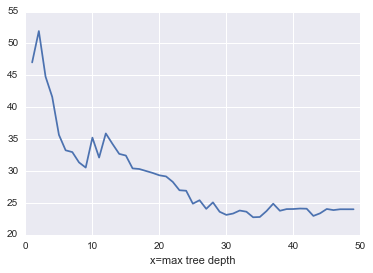

In [70]:
# DECISION TREE MODELING: 1.2 CART-solution-code

x = df_C1.drop(class_p, axis = 1)
y = df_C1[class_p]

# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = x
X_test = x
y_train = y
y_test = y

# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeClassifier
treereg = DecisionTreeClassifier(random_state=42, max_depth=20)
treereg.fit(X_train, y_train)


# make predictions
preds = treereg.predict(X_test)


# Kiefer note: R2 is for regressions, not classification
# from sklearn.metrics import r2_score
# r2_score(y_test, preds)
# print r2_score

# use cross-validation to find best max_depth
from sklearn.cross_validation import cross_val_score

all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 50):
    treereg = DecisionTreeClassifier(max_depth=i, random_state=1)
    # Kiefer note: mean squared error is for regression, not classification
    scores = cross_val_score(treereg, x, y, cv=2, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeClassifier(max_depth=8, random_state=1)
treereg.fit(x, y)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(range(1, 50), all_scores)
plt.xlabel('x=max tree depth')

In [71]:
scores = cross_val_score(DecisionTreeClassifier(), x, y, cv=3)
print scores
print np.mean(scores)

[ 0.12621359  0.25925926  0.375     ]
0.253490950497


/Users/noriogura/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [72]:
from sklearn.grid_search import GridSearchCV

dtc = DecisionTreeClassifier()

dtc_params = {
    'max_depth':[None,2,3,4,5,6],
    'max_features':[None,'auto'],
    'criterion':['gini','entropy']
}

# RUN THE GRID SEARCH!!


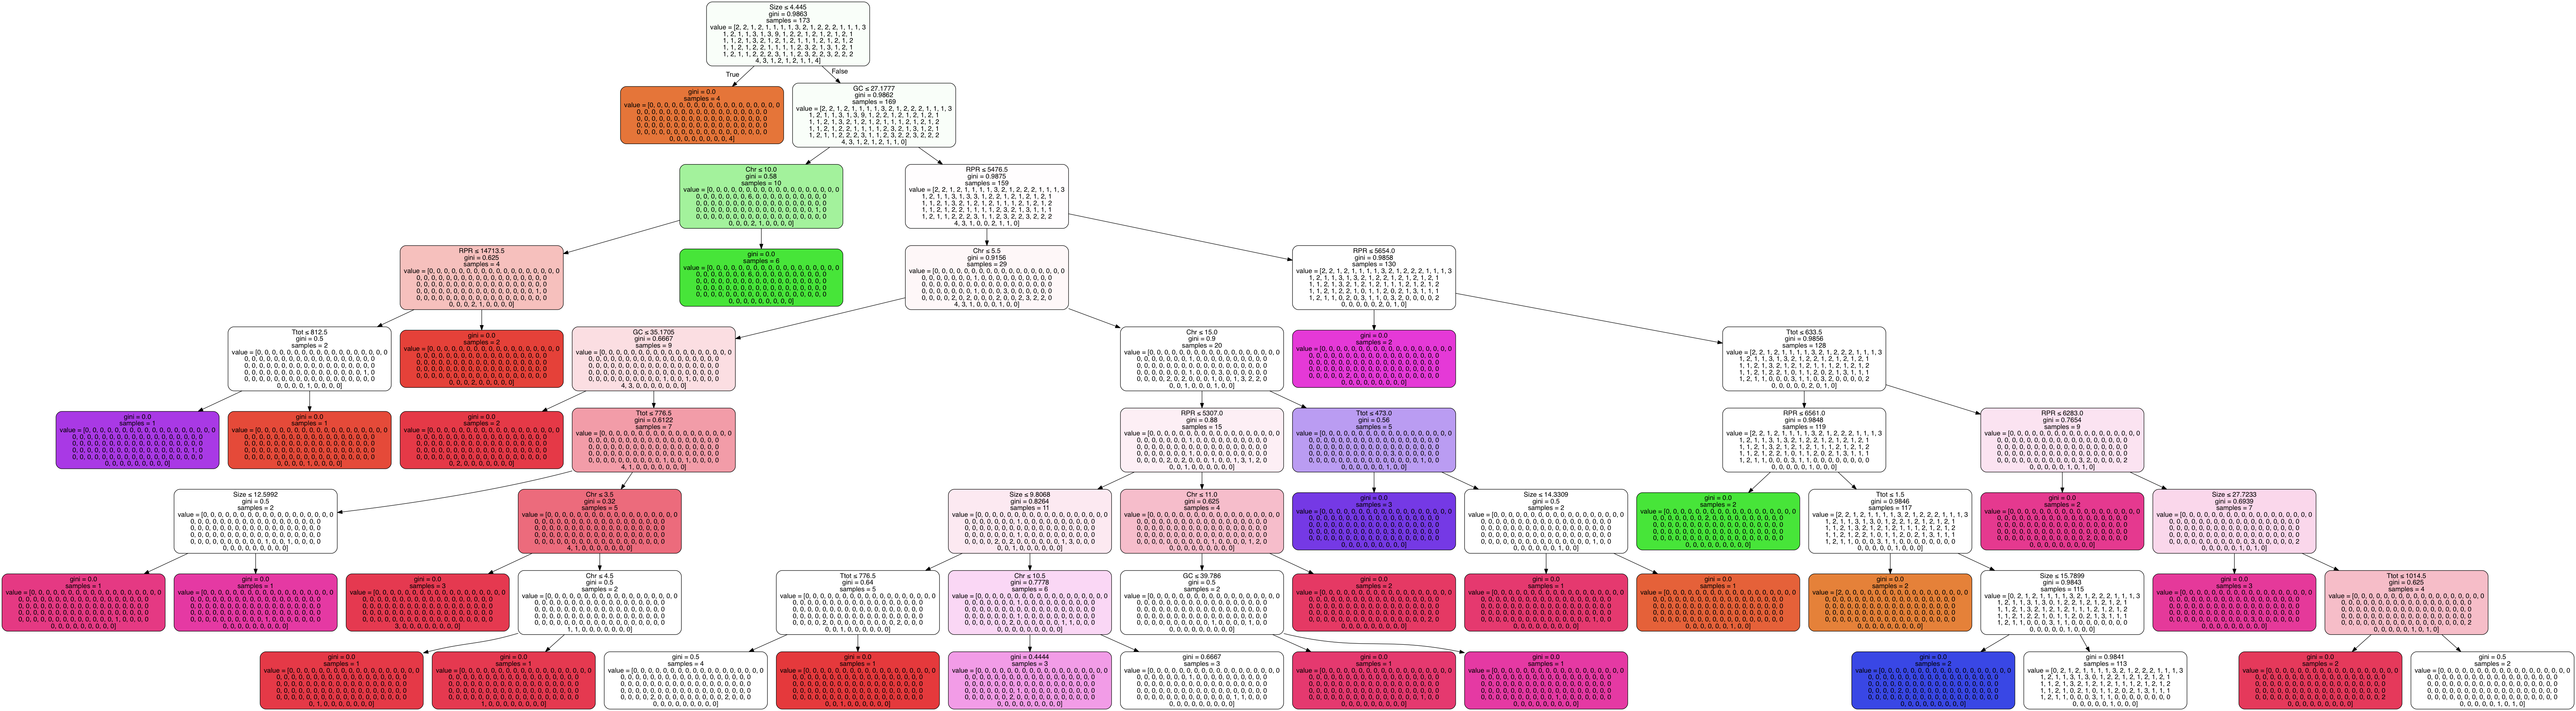

In [73]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()  
export_graphviz(treereg, out_file=dot_data,  
                feature_names=x.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 



In [74]:
export_graphviz(treereg, out_file='./tree_str.txt')

In [75]:

#Make DF for Classification plotting of errors

##df_C1_TEST['predicted_DT'] = preds
df_C1_TEST['predict_DT'] = np.rint(preds)

df_C1_TEST.head(3)


/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Size   Chr       GC      RPR   Ttot Classsub  Classsub0  predict_r  \
0   381.896  25.0  38.5375  23598.0  109.0   Poales         64       42.0   
1  1799.140  13.0  40.8238  34827.0   48.0   Sauria         50        3.0   
2   265.027   5.0  44.5000  14099.0   57.0  Diptera         54       42.0   

              Organism errors  predict_DT  
0       Ananas comosus      F        64.0  
1  Anolis carolinensis      F        50.0  
2    Anopheles gambiae      F        54.0

In [76]:
target_name = class_p
predict_name = 'predict_DT'

def checkerrsB(series):
    a = "T"
    if series[target_name] == series[predict_name]:
        a = "T"
    else:
        a = "F"
    return a

df_C1_TEST['errors_DT'] = df_C1_TEST.apply(checkerrsB, axis=1)

In [77]:
df_C1_TEST.head(3)

Size   Chr       GC      RPR   Ttot Classsub  Classsub0  predict_r  \
0   381.896  25.0  38.5375  23598.0  109.0   Poales         64       42.0   
1  1799.140  13.0  40.8238  34827.0   48.0   Sauria         50        3.0   
2   265.027   5.0  44.5000  14099.0   57.0  Diptera         54       42.0   

              Organism errors  predict_DT errors_DT  
0       Ananas comosus      F        64.0         T  
1  Anolis carolinensis      F        50.0         T  
2    Anopheles gambiae      F        54.0         T

In [78]:
df_C1_TEST['errors_DT'].value_counts() ####WHOA!!!

T    164
F      9
Name: errors_DT, dtype: int64

In [79]:
df_C1_TEST[df_C1_TEST['errors_DT'] != 'T']

Size   Chr       GC      RPR   Ttot       Classsub  Classsub0  \
13    566.567   9.0  36.4500  31282.0   28.0   Pentapetalae         35   
16   2670.140  31.0  41.8776  39053.0   17.0            Bos         25   
108  2287.340  28.0  42.8312  30752.0    9.0       Muroidea         17   
124  1995.610  19.0  45.6584  24786.0   46.0       Mammalia         48   
125  2737.460  22.0  44.0526  37564.0   26.0         Glires         31   
162  2870.180  22.0  42.3564  38722.0   13.0        Murinae         23   
169   364.538   8.0  35.2373  11787.0  144.0    Protostomia         66   
190   345.994  10.0  35.2428  44183.0   40.0      Malvaceae         41   
193   165.944  10.0  35.1887  22611.0   48.0  Endopterygota         49   

     predict_r                  Organism errors  predict_DT errors_DT  
13        42.0             Beta vulgaris      F        33.0         F  
16         1.0                Bos taurus      F        10.0         F  
108        1.0      Microtus ochrogaster      F        10.0         F  
124       13.0  Ornithorhynchus anatinus      F        10.0         F  
125        1.0     Oryctolagus cuniculus      F        10.0         F  
162        1.0         Rattus norvegicus      F        10.0         F  
169       42.0       Schistosoma mansoni      F        33.0         F  
190       42.0           Theobroma cacao      F        33.0         F  
193       12.0       Tribolium castaneum      F        33.0         F

In [80]:
### SHOULD LOOP THROUGH THE TREE
### GET CLASSIFICATION????

df_subO_EP3B_[df_subO_EP3B_['Classsub0']==95]

Organism    Kingdom      Size  Chr       GC     RPR  \
10   Babesia bigemina  Eukaryota  13.84090  5.0  50.6069  5079.0   
11      Babesia bovis  Eukaryota   8.17971  2.0  41.6127  3706.0   
12    Babesia microti  Eukaryota   6.39244  3.0  36.3000  3492.0   
187    Theileria equi  Eukaryota  11.67450  2.0  39.4681  5329.0   

                                               Classes   Ttot     expT0  \
10   [, Babesia bigemina, Babesia, Piroplasmorida, ...  789.0  67.42393   
11   [, Babesia bovis, Babesia, Piroplasmorida, Aco...  789.0  67.42393   
12   [, Babesia microti, Babesia, Piroplasmorida, A...  789.0  67.42393   
187  [, Theileria equi, Babesia, Piroplasmorida, Ac...  789.0  67.42393   

    Classsub                                          Classsub1  Classsub0  
10   Babesia  [Babesia, Piroplasmorida, Aconoidasida, Apicom...         95  
11   Babesia  [Babesia, Piroplasmorida, Aconoidasida, Apicom...         95  
12   Babesia  [Babesia, Piroplasmorida, Aconoidasida, Apicom...         95  
187  Babesia  [Babesia, Piroplasmorida, Aconoidasida, Apicom...         95

In [81]:
df_C1_TEST[df_C1_TEST['Classsub0']==95]

Size  Chr       GC     RPR   Ttot Classsub  Classsub0  predict_r  \
10   13.84090  5.0  50.6069  5079.0  789.0  Babesia         95       95.0   
11    8.17971  2.0  41.6127  3706.0  789.0  Babesia         95       95.0   
12    6.39244  3.0  36.3000  3492.0  789.0  Babesia         95       95.0   
187  11.67450  2.0  39.4681  5329.0  789.0  Babesia         95       95.0   

             Organism errors  predict_DT errors_DT  
10   Babesia bigemina      T        95.0         T  
11      Babesia bovis      T        95.0         T  
12    Babesia microti      T        95.0         T  
187    Theileria equi      T        95.0         T

In [82]:
df_subO_EP3B_.ix[53]['Classes']

[u'',
 u'Drosophila pseudoobscura',
 u'pseudoobscura subgroup',
 u'obscura group',
 u'Sophophora',
 u'Drosophila',
 u'Drosophiliti',
 u'Drosophilina',
 u'Drosophilini',
 u'Drosophilinae',
 u'Drosophilidae',
 u'Ephydroidea',
 u'Acalyptratae',
 u'Schizophora',
 u'Cyclorrhapha',
 u'Eremoneura',
 u'Muscomorpha',
 u'Brachycera',
 u'Diptera',
 u'Endopterygota',
 u'Neoptera',
 u'Pterygota',
 u'Dicondylia',
 u'Insecta',
 u'Hexapoda',
 u'Pancrustacea',
 u'Mandibulata',
 u'Arthropoda',
 u'Panarthropoda',
 u'Ecdysozoa',
 u'Protostomia',
 u'Bilateria',
 u'Eumetazoa',
 u'Metazoa',
 u'Holozoa',
 u'Opisthokonta',
 u'Eukaryota',
 u'cellular organisms',
 u'life0']

In [83]:
classes_list 

['Bathycoccaceae',
 'Aspergillus',
 'Cryptococcus',
 'Tremellaceae',
 'Eucoccidiorida',
 'Trifolieae',
 'Apoidea',
 'Bovinae',
 'Leishmania braziliensis species complex',
 'Camelineae',
 'Eimeriorina',
 'Aculeata',
 'Kazachstania',
 'Bos',
 'Naumovozyma',
 'Oligohymenophorea',
 'Conthreep',
 'Panicoideae',
 'Mamiellales',
 'Tetrapisispora',
 'Dalbergieae',
 'pseudoobscura subgroup',
 'Percomorphaceae',
 'Bacillariophyta',
 'Ostreococcus',
 'Phaffomycetaceae',
 'Lachancea',
 'Eremothecium',
 'Tremellales',
 'Sordariales',
 'Tremellomycetes',
 'Mus subgenus Mus',
 'Fusarium',
 'Ctenosquamata',
 'Protacanthopterygii',
 'Kluyveromyces',
 'obscura group',
 'prasinophytes',
 'lamiids',
 'Mamiellophyceae',
 'Arachis',
 'Leishmania donovani species complex',
 'Pan',
 'Macaca',
 'Capra',
 'Ovis',
 'Candida',
 'Acanthomorphata',
 'Euacanthomorphacea',
 'Hymenostomatia',
 'Candida/Lodderomyces clade',
 'Mus',
 'Sporisorium',
 'Chlorophyta',
 'Bacillariophytina',
 'Deinococcus',
 'Alphaproteobacte

In [84]:
################ CLASS COUNTS REMOVE SPECIES TAXONOMIES

# Take all of the Classes, do value counts
class_count = []
for i in df_subO_EP3B_['Classes']:
    class_count.append(i)

print class_count[2]
class_count = [[s.encode('ascii') for s in list] for list in class_count] #Get rid of unicode, be careful of encoding during import and export
#class_count = [i.remove(i[1]) for i in class_count] #doesn't work, maybe NaN's

###Get rid of 1st (2nd in list, 1st is blank) SPECIES from common list
for x in (class_count):
    try:
        del x[1]
        
    except:
        pass
    
print class_count[2]

# print class_count[0]

class_count = [j for i in class_count for j in i] #get rid of nested list, pretty cool...
df_classesA = pd.DataFrame(class_count)
df_classesA.rename(columns={0: 'Classes'}, inplace=True)

df_classesB = pd.DataFrame(df_classesA['Classes'].value_counts())
df_classesB.head(10)
#df_classesB = df_classesB[df_classesB['Classes'] == 1] #Mask for Classes with > 1 counts, Keep 1 counts now

df_classesB = df_classesB.reset_index(level=None) #Get rid of hierarchical index
df_classesB = df_classesB[df_classesB['index']!= ''] #Get rid of blank index
df_classesB = df_classesB.sort_values(['Classes'], ascending=True) #Resort counts ascending
df_classesB.rename(columns={'index': 'Names'}, inplace=True)
df_classesB['Names'] = df_classesB['Names'].map(lambda x: str(x))


classes_list = df_classesB['Names'].tolist()
# classes_list = [x for x in class_list if x not in ]
classes_list 

[u'', u'Anopheles gambiae', u'gambiae species complex', u'Pyretophorus', u'Cellia', u'Anopheles', u'Anophelinae', u'Culicidae', u'Culicoidea', u'Culicomorpha', u'Nematocera', u'Diptera', u'Endopterygota', u'Neoptera', u'Pterygota', u'Dicondylia', u'Insecta', u'Hexapoda', u'Pancrustacea', u'Mandibulata', u'Arthropoda', u'Panarthropoda', u'Ecdysozoa', u'Protostomia', u'Bilateria', u'Eumetazoa', u'Metazoa', u'Holozoa', u'Opisthokonta', u'Eukaryota', u'cellular organisms', u'life0']
['', 'gambiae species complex', 'Pyretophorus', 'Cellia', 'Anopheles', 'Anophelinae', 'Culicidae', 'Culicoidea', 'Culicomorpha', 'Nematocera', 'Diptera', 'Endopterygota', 'Neoptera', 'Pterygota', 'Dicondylia', 'Insecta', 'Hexapoda', 'Pancrustacea', 'Mandibulata', 'Arthropoda', 'Panarthropoda', 'Ecdysozoa', 'Protostomia', 'Bilateria', 'Eumetazoa', 'Metazoa', 'Holozoa', 'Opisthokonta', 'Eukaryota', 'cellular organisms', 'life0']


['Gallus',
 'Pteromalidae',
 'Cyanidiales',
 'Deinococcales',
 'Felis',
 'Digenea',
 'Pichiaceae',
 'Cynoglossinae',
 'Equidae',
 'Amygdaleae',
 'Mediophyceae',
 'Esociformes',
 'Iguanidae',
 'Eutrema',
 'Trematoda',
 'Nomascus',
 'Sesamum',
 'Magnaporthales',
 'Salmoniformes',
 'Andropogonodae',
 'Oxytricha',
 'Felidae',
 'Bifurcata',
 'Magnaporthe',
 'Leishmania guyanensis species complex',
 'Carangaria',
 'Polyphaga',
 'Rhabditidae',
 'Callithrix',
 'Cyanidophytina',
 'Diaporthales',
 'Arecoideae',
 'Cyanidioschyzon',
 'Lycopersicon',
 'Didelphidae',
 'Cynoglossus',
 'Arabideae',
 'Equus subgenus Equus',
 'Phaeodactylum',
 'Perissodactyla',
 'Cricetidae',
 'Pteromalinae',
 'Leporidae',
 'Otophysa',
 'Monodelphis',
 'Neospora',
 'Unidentata',
 'Semionotiformes',
 'Chaetomiaceae',
 'Citrus',
 'Tetrahymena',
 'virilis group',
 'Microtus',
 'Lophotrochozoa',
 'Torulaspora',
 'Tenebrionoidea',
 'Testudines',
 'Coturnix',
 'Rhabditoidea',
 'Hylobatidae',
 'Bromeliaceae',
 'Sorghinae',
 'C

In [85]:
df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   

  Classsub                                          Classsub1  Classsub0  
0   Poales  [Poales, commelinids, Petrosaviidae, Liliopsid...         64  
1   Sauria  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...         50  
2  Diptera  [Diptera, Endopterygota, Neoptera, Pterygota, ...         54

In [282]:
##########GET TAXONOMY####################

### FROM OT-TNRS-MATCH-NAMES#########
#####################################
#!/usr/bin/env python
'''Simple command-line tool that wraps the taxonomic name matching service
    which is described at https://github.com/OpenTreeOfLife/opentree/wiki/Open-Tree-of-Life-APIs#match_names
'''
import pprint
import sys

def ot_tnrs_match_names(name_list,
                        context_name=None,
                        do_approximate_matching=True,
                        include_dubious=False,
                        include_deprecated=True,
                        tnrs_wrapper=None):
    '''Uses a peyotl wrapper around an Open Tree web service to get a list of OTT IDs matching
    the `name_list`.
    The tnrs_wrapper can be None (in which case the default wrapper from peyotl.sugar will be used.
    All other arguments correspond to the arguments of the web-service call.
    A ValueError will be raised if the `context_name` does not match one of the valid names for a
        taxonomic context.
    This uses the wrap_response option to create and return a TNRSRespose object around the response.
    '''
    if tnrs_wrapper is None:
        from peyotl.sugar import tnrs
        tnrs_wrapper = tnrs
    match_obj = tnrs_wrapper.match_names(name_list,
                                         context_name=context_name,
                                         do_approximate_matching=do_approximate_matching,
                                         include_deprecated=include_deprecated,
                                         include_dubious=include_dubious,
                                         wrap_response=True)
    return match_obj


def match_and_print(name_list, context_name, do_approximate_matching, include_dubious, include_deprecated, output):
    '''Demonstrates how to read the response from a match_names query when peyotl's wrap_response option is
    used.

    If the context_name is not recognized, the attempt to match_names will generate a ValueError exception.
    Here this is caught, and we call the tnrs/contexts web service to get the list of valid context_names
        to provide the user of the script with some hints.
    '''
    from peyotl.sugar import tnrs
    try:
        # Perform the match_names, and return the peyotl wrapper around the response.
        result = ot_tnrs_match_names(name_list,
                                     context_name=context_name,
                                     do_approximate_matching=do_approximate_matching,
                                     include_dubious=include_dubious,
                                     include_deprecated=include_deprecated,
                                     tnrs_wrapper=tnrs)
    except Exception as x:
        msg = str(x)
        if 'is not a valid context name' in msg and context_name is not None:
            # Here is a wrapper around the call to get the context names
            valid_contexts = tnrs.contexts()
            m = 'The valid context names are the strings in the values of the following "tnrs/contexts" dict:\n'
            sys.stderr.write(m)
            epp = pprint.PrettyPrinter(indent=4, stream=sys.stderr)
            epp.pprint(valid_contexts)
        raise RuntimeError('ot-tnrs-match-names: exception raised. {}'.format(x))
    # The code below demonstrates how to access the information from the response in the wrapper
    #   that is created by using the wrap_response option in the call
    #output.write(u'A v2/tnrs/match_names query was performed using: {} \n'.format(tnrs.endpoint))
    #output.write(u'The taxonomy being served by that server is:')
    #output.write(u' {}'.format(result.taxonomy.source))
    #output.write(u' by {}\n'.format(result.taxonomy.author))
    #output.write(u'Information for the taxonomy can be found at {}\n'.format(result.taxonomy.weburl))
    #output.write(u'{} out of {} queried name(s) were matched\n'.format(len(result.matched_name_ids), len(name_list)))
    #output.write(u'{} out of {} queried name(s) were unambiguously matched\n'.format(len(result.unambiguous_name_ids), len(name_list)))
    #output.write(u'The context_name for the matched names was "{}"'.format(result.context))
    #if result.context_inferred:
        #output.write(u' (this context was inferred based on the matches).\n')
    #else:
        #output.write(u' (this context was supplied as an argument to speed up the name matching).\n')
    #output.write(u'The name matching result(s) used approximate/fuzzy string matching? {}\n'.format(result.includes_approximate_matches))
    #output.write(u'The name matching result(s) included dubious names? {}\n'.format(result.includes_dubious_names))
    #output.write(u'The name matching result(s) included deprecated taxa? {}\n'.format(result.includes_deprecated_taxa))
    for name in name_list:
        match_tuple = result[name]
        #output.write(u'The query name "{}" produced {} result(s):\n'.format(name, len(match_tuple)))
        for match_ind, match in enumerate(match_tuple):
            #output.write(u'  Match #{}\n'.format(match_ind))
            
            ### OTT ID######
            #output.write(u'    OTT ID (ot:ottId) = {}\n'.format(match.ott_id))
            
            #output.write(u'{}\n'.format(match.ott_id))
            
            #output.write(u'    name (ot:ottTaxonName) = "{}"\n'.format(match.name))
            #output.write(u'    query was matched using fuzzy/approximate string matching? {}\n'.format(match.is_approximate_match))
            #output.write(u'    match score = {}\n'.format(match.score))
            #output.write(u'    query name is a junior synonym of this match? {}\n'.format(match.is_synonym))
            #output.write(u'    is deprecated from OTT? {}\n'.format(match.is_deprecated))
            #output.write(u'    is dubious taxon? {}\n'.format(match.is_dubious))
            #if match.synonyms:
                #output.write(u'    known synonyms: "{}"\n'.format('", "'.join(match.synonyms)))
            #else:
                #output.write(u'    known synonyms: \n')
            #output.write(u'    OTT flags for this taxon: {}\n'.format(match.flags))
            output.write(u'{}\n'.format(match.rank))
            #output.write(u'    The nomenclatural code for this name is: {}\n'.format(match.nomenclature_code))
            #output.write(u'    The (unstable) node ID in the current taxomachine instance is: {}\n'.format(match.taxomachine_node_id))

    return match.rank            

def main_match(argv):
    '''This function sets up a command-line option parser and then calls match_and_print
    to do all of the real work.
    '''
    import argparse
    import codecs
    description = 'Uses Open Tree of Life web services to try to find a taxon ID for each name supplied. ' \
                  'Using a --context-name=NAME to provide a limited taxonomic context and using the '\
                  ' --prohibit-fuzzy-matching option can make the matching faster.'
    parser = argparse.ArgumentParser(prog='ot-tnrs-match-names', description=description)
    parser.add_argument('names', nargs='+', help='name(s) for which we will try to find OTT IDs')
    parser.add_argument('--context-name', default=None, type=str, required=False)
    parser.add_argument('--include-dubious',
                        action='store_true',
                        default=False,
                        required=False,
                        help='return matches to taxa that are not included the synthetic tree because their taxonomic status is doubtful')
    parser.add_argument('--include-deprecated', action='store_true', default=False, required=False)
    parser.add_argument('--prohibit-fuzzy-matching', action='store_true', default=False, required=False)
    args = parser.parse_args(argv)
    # The service takes do_approximate_matching
    # We use the opposite to make the command-line just include positive directives
    #   (as opposed to requiring --do-approximate-matching=False) so we use "not"
    do_approximate_matching = not args.prohibit_fuzzy_matching
    name_list = args.names
    if len(name_list) == 0:
        name_list = ["Homo sapiens", "Gorilla gorilla"]
        sys.stderr.write('Running a demonstration query with {}\n'.format(name_list))
    else:
        for name in name_list:
            if name.startswith('-'):
                parser.print_help()
    # have to be ready to deal with utf-8 names
    out = codecs.getwriter('utf-8')(sys.stdout)
    print "name list ok?", name_list, out
    return match_and_print(name_list,
                    context_name=args.context_name,
                    do_approximate_matching=do_approximate_matching,
                    include_dubious=args.include_dubious,
                    include_deprecated=args.include_deprecated,
                    output=out)

In [87]:
p_organism = 'Gallus'
a = main_match([p_organism]) 

genus
genus


In [88]:
df_classesB.head(3)

Names  Classes
278        Gallus        1
379  Pteromalidae        1
378   Cyanidiales        1

In [89]:
import numpy as np #############THIS TAKES TIME, PROBABLY SHOULD PICKLE THIS##############

df_classesB['Taxon'] = ''

print len(df_classesB)

for i in df_classesB.index.values:
    #print i
    try:
        df_classesB['Taxon'][i] = str(main_match([df_classesB['Names'][i]])) #API for Taxon in Open Tree!!!
    except:
        pass

df_classesB.tail(10)

555
genus
genus


/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


family
order
order
order
genus
subclass
genus
family
subfamily
family
no rank
class
order
family
genus
genus
class
genus
genus
order
order
no rank
genus
family
no rank
genus
species group
no rank
suborder
genus
family
genus
subdivision
order
subfamily
genus
genus
subgenus
family
genus
tribe
subgenus
genus
order
family
subfamily
family
no rank
genus
genus
no rank
order
family
genus
genus
species group
genus
no rank
genus
superfamily
order
genus
superfamily
family
family
subtribe
genus
phylum
genus
genus
class
class
genus
subfamily
family
superfamily
genus
no rank
genus
species group
genus
tribe
tribe
order
genus
genus
order
genus
genus
superorder
genus
genus
genus
family
genus
tribe
genus
genus
family
suborder
no rank
class
genus
family
subfamily
genus
subfamily
genus
genus
tribe
family
superfamily
order
family
no rank
genus
tribe
genus
no rank
genus
order
family
genus
genus
order
suborder
family
genus
family
genus
order
genus
genus
genus
subfamily
genus
order
genus
genus
infraorder
phy

Names  Classes    Taxon
10               Fungi       46  kingdom
9            Bilateria       48  no rank
8            Eumetazoa       48  no rank
7              Metazoa       48  kingdom
6              Holozoa       48  no rank
5                h2007       92         
4         Opisthokonta       94   phylum
3            Eukaryota      165   domain
2                life0      169  no rank
1   cellular organisms      169  no rank

In [91]:
#Group by Taxons:

group_with_Names = pd.DataFrame(df_classesB.groupby(['Taxon','Names'], as_index = False).sum())
group_just_Taxon = df_classesB['Classes'].groupby(df_classesB['Taxon']).sum()
#df_Taxon = pd.DataFrame(group.sum())

In [92]:
len(df_classesB) 

555

In [93]:
group_just_Taxon.reset_index(level=None) #Get rid of hierarchical index
group_with_Names.reset_index(level=None) #Get rid of hierarchical index
#group_just_Taxon = group_just_Taxon.sort_values(['0'], ascending=[False])
group_with_Names = group_with_Names.sort_values(['Classes'], ascending=[False])

In [94]:
group_just_Taxon.reset_index(level=None) #Get rid of hierarchical index
group_just_Taxon= group_just_Taxon[1:]
group_just_Taxon = group_just_Taxon.sort_values

In [95]:
#group_with_Names[group_with_Names['Taxon'] =='infrakingdom']


In [96]:
#Let's do kingdom first = classes_list
classes_list_0 = group_with_Names[group_with_Names['Taxon'] =='infrakingdom']['Names'].tolist()
classes_list = group_with_Names[group_with_Names['Taxon'] =='kingdom']['Names'].tolist()

In [97]:
df_subO_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   

  Classsub                                          Classsub1  Classsub0  
0   Poales  [Poales, commelinids, Petrosaviidae, Liliopsid...         64  
1   Sauria  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...         50  
2  Diptera  [Diptera, Endopterygota, Neoptera, Pterygota, ...         54

In [98]:
df_sub1_EP3B_ = df_subO_EP3B_

In [99]:
df_subO_EP3B_.head(20)

Organism    Kingdom        Size   Chr       GC       RPR  \
0            Ananas comosus  Eukaryota   381.89600  25.0  38.5375   23598.0   
1       Anolis carolinensis  Eukaryota  1799.14000  13.0  40.8238   34827.0   
2         Anopheles gambiae  Eukaryota   265.02700   5.0  44.5000   14099.0   
3            Apis mellifera  Eukaryota   250.28700  16.0  33.1169   22456.0   
4      Arabidopsis thaliana  Eukaryota   119.66800   6.0  36.6000   33107.0   
5             Arabis alpina  Eukaryota   308.03300   8.0  37.9325   23286.0   
6        Arachis duranensis  Eukaryota  1068.35000  10.0  37.4869   42562.0   
7          Arachis ipaensis  Eukaryota  1349.06000  10.0  37.7351   46410.0   
8     Aspergillus fumigatus  Eukaryota    29.38500   8.0  49.4000    9585.0   
9      Aspergillus nidulans  Eukaryota    30.24270   8.0  50.3350   10037.0   
10         Babesia bigemina  Eukaryota    13.84090   5.0  50.6069    5079.0   
11            Babesia bovis  Eukaryota     8.17971   2.0  41.6127    3706.0   
12          Babesia microti  Eukaryota     6.39244   3.0  36.3000    3492.0   
13            Beta vulgaris  Eukaryota   566.56700   9.0  36.4500   31282.0   
14        Bombus terrestris  Eukaryota   248.65400  18.0  38.0986   20321.0   
16               Bos taurus  Eukaryota  2670.14000  31.0  41.8776   39053.0   
17         Botrytis cinerea  Eukaryota    42.74380  18.0  42.5000   16353.0   
18  Brachypodium distachyon  Eukaryota   272.13300  10.0  46.4377   67788.0   
19           Brassica napus  Eukaryota   930.50800  38.0  37.6116  154923.0   
20        Brassica oleracea  Eukaryota   488.95400  18.0  37.2377  111121.0   

                                              Classes   Ttot       expT0  \
0   [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1   [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2   [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   
3   [, Apis mellifera, Apis, Apini, Apinae, Apidae...   33.0  143.595454   
4   [, Arabidopsis thaliana, Arabidopsis, Cameline...    5.0  147.672945   
5   [, Arabis alpina, Arabis, Arabideae, Brassicac...   13.0  146.496275   
6   [, Arachis duranensis, Arachis, Dalbergieae, P...   58.0  140.050070   
7   [, Arachis ipaensis, Arachis, Dalbergieae, Pap...   58.0  140.050070   
8   [, Aspergillus fumigatus, Aspergillus, Trichoc...   55.0  140.470851   
9   [, Aspergillus nidulans, Aspergillus, Trichoco...  150.0  127.740390   
10  [, Babesia bigemina, Babesia, Piroplasmorida, ...  789.0   67.423930   
11  [, Babesia bovis, Babesia, Piroplasmorida, Aco...  789.0   67.423930   
12  [, Babesia microti, Babesia, Piroplasmorida, A...  789.0   67.423930   
13  [, Beta vulgaris, Beta, Amaranthaceae, Caryoph...   28.0  144.315229   
14  [, Bombus terrestris, Bombus subgenus Bombus, ...   22.0  145.183724   
16  [, Bos taurus, Bos, Bovinae, Bovidae, Pecora, ...   17.0  145.911460   
17  [, Botrytis cinerea, Botrytis, Sclerotiniaceae...  296.0  110.387842   
18  [, Brachypodium distachyon, Brachypodium, Brac...   13.0  146.496275   
19  [, Brassica napus, Brassica, Brassiceae, Brass...    5.0  147.672945   
20  [, Brassica oleracea, Brassica, Brassiceae, Br...    5.0  147.672945   

          Classsub                                          Classsub1  \
0           Poales  [Poales, commelinids, Petrosaviidae, Liliopsid...   
1           Sauria  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...   
2          Diptera  [Diptera, Endopterygota, Neoptera, Pterygota, ...   
3           Apidae  [Apidae, Apoidea, Aculeata, Apocrita, Hymenopt...   
4       Camelineae  [Camelineae, Brassicaceae, Brassicales, malvid...   
5     Brassicaceae  [Brassicaceae, Brassicales, malvids, rosids, P...   
6          Arachis  [Arachis, Dalbergieae, Papilionoideae, Fabacea...   
7          Arachis  [Arachis, Dalbergieae, Papilionoideae, Fabacea...   
8      Aspergillus  [Aspergillus, Trichocomaceae, Eurotiales, Euro...   
9      Aspergillus  [Aspergillus

In [100]:
len(df_sub1_EP3B_)

173

In [101]:
species_n = len(df_sub1_EP3B_)
classes_p = []


#df_sub1_EP3B_['Organism'][13]

for i in df_sub1_EP3B_.index.values:
    m = ''
    for k,l in enumerate(df_sub1_EP3B_['Classes'][i]):
        #print df_subO_EP1A_['Classes'][i][k]
        #print classes_list
        if df_sub1_EP3B_['Classes'][i][k] in classes_list:
            m = df_sub1_EP3B_['Classes'][i][k]
            break
        elif df_sub1_EP3B_['Classes'][i][k] in classes_list_0:
            m = df_sub1_EP3B_['Classes'][i][k]
            break
        m = ''
    classes_p.append(m)
    print m, " ",i
    
df_sub1_EP3B_['Classsub'] = classes_p
df_sub1_EP3B_[df_sub1_EP3B_['Classsub']=='']

Chloroplastida   0
Metazoa   1
Metazoa   2
Metazoa   3
Chloroplastida   4
Chloroplastida   5
Chloroplastida   6
Chloroplastida   7
Fungi   8
Fungi   9
Alveolata   10
Alveolata   11
Alveolata   12
Chloroplastida   13
Metazoa   14
Metazoa   16
Fungi   17
Chloroplastida   18
Chloroplastida   19
Chloroplastida   20
Chloroplastida   21
Metazoa   22
   23
Metazoa   24
Chloroplastida   25
Fungi   26
Fungi   27
Fungi   28
Metazoa   30
   31
Metazoa   33
Metazoa   34
Chloroplastida   35
Metazoa   36
Fungi   38
Fungi   39
Alveolata   40
Chloroplastida   41
   42
Fungi   43
Metazoa   44
Metazoa   45
Chloroplastida   46
Fungi   47
   48
Fungi   49
Metazoa   51
Metazoa   53
Metazoa   54
Metazoa   55
Metazoa   56
Stramenopiles   57
Alveolata   58
Chloroplastida   59
   60
   61
   62
   63
Metazoa   64
Fungi   65
Fungi   66
Metazoa   67
Chloroplastida   68
Metazoa   69
Metazoa   70
Chloroplastida   72
Fungi   73
Fungi   74
Fungi   75
Fungi   76
Fungi   77
Metazoa   78
Chloroplastida   79
Metazoa   8

Organism    Kingdom        Size   Chr       GC  \
23         Caenorhabditis elegans  Eukaryota   100.28600   6.0  35.4659   
31                Capsicum annuum  Eukaryota  2935.88000  12.0  35.5000   
42        Cyanidioschyzon merolae  Eukaryota    16.54670  20.0  55.0171   
48       Dictyostelium discoideum  Eukaryota    34.20500   6.0  22.4631   
60       Encephalitozoon cuniculi  Eukaryota     2.49752  11.0  46.9000   
61         Encephalitozoon hellem  Eukaryota     2.25178  10.0  43.3650   
62   Encephalitozoon intestinalis  Eukaryota     2.21690  11.0  41.5182   
63       Encephalitozoon romaleae  Eukaryota     2.18759  10.0  40.3432   
173          Solanum lycopersicum  Eukaryota   823.78600  12.0  35.1048   
178           Strongyloides ratti  Eukaryota    43.15020   3.0  21.5777   

         RPR                                            Classes    Ttot  \
23   28026.0  [, Not Caenorhabditis elegans, Burkholderia, B...    60.0   
31   45410.0  [, Capsicum annuum, Deinococcus, Deinococcacea...    27.0   
42    4803.0  [, Cyanidioschyzon merolae, Cyanidioschyzon, C...  1230.0   
48   13315.0  [, Dictyostelium discoideum, Dictyostelium, Di...  1084.0   
60    1915.0                                                     1303.0   
61    1847.0                                                     1303.0   
62    1939.0                                                     1303.0   
63    1831.0                                                     1303.0   
173  36149.0  [, Not Solanum lycopersicum, Sphingomonas, Sph...    18.0   
178  12450.0  [, Strongyloides ratti, Bradyrhizobium, Bradyr...   541.0   

          expT0 Classsub                                          Classsub1  \
23   139.770250           [Proteobacteria, Bacteria, cellular organisms,...   
31   144.459617           [Deinococcus, Deinococcus, Bacteria, cellular ...   
42    43.380065           [Archaeplastida, Eukaryota, cellular organisms...   
48    50.199246                      [Eukaryota, cellular organisms, life0]   
60    40.326144                                                          []   
61    40.326144                                                          []   
62    40.326144                                                          []   
63    40.326144                                                          []   
173  145.765622           [Alphaproteobacteria, Proteobacteria, Bacteria...   
178   86.401065           [Alphaproteobacteria, Proteobacteria, Bacteria...   

     Classsub0  
23          56  
31          33  
42         101  
48          99  
60         103  
61         103  
62         103  
63         103  
173         74  
178         74

In [102]:
df_sub1_EP3B_['Classes'][23]

[u'',
 u'Not Caenorhabditis elegans',
 u'Burkholderia',
 u'Burkholderiaceae',
 u'Burkholderiales',
 u'Betaproteobacteria',
 u'Proteobacteria',
 u'Bacteria',
 u'cellular organisms',
 u'life0']

In [103]:
group_with_Names[group_with_Names.Names == 'Bacteria']

Taxon     Names  Classes
30  domain  Bacteria        4

In [104]:
classes_list

['Metazoa', 'Fungi', 'Chloroplastida']

In [105]:
classes_list_0

['Alveolata', 'Excavata', 'Euglenozoa', 'Stramenopiles']

In [106]:
group_with_Names[group_with_Names.Taxon == 'domain']

Taxon      Names  Classes
31  domain  Eukaryota      165
30  domain   Bacteria        4

In [294]:
### FROM OT-TNRS-MATCH-NAMES#########
#####################################
#!/usr/bin/env python
'''Simple command-line tool that wraps the taxonomic name matching service
    which is described at https://github.com/OpenTreeOfLife/opentree/wiki/Open-Tree-of-Life-APIs#match_names
'''
import pprint
import sys

def ot_tnrs_match_names(name_list,
                        context_name=None,
                        do_approximate_matching=True,
                        include_dubious=False,
                        include_deprecated=True,
                        tnrs_wrapper=None):
    '''Uses a peyotl wrapper around an Open Tree web service to get a list of OTT IDs matching
    the `name_list`.
    The tnrs_wrapper can be None (in which case the default wrapper from peyotl.sugar will be used.
    All other arguments correspond to the arguments of the web-service call.
    A ValueError will be raised if the `context_name` does not match one of the valid names for a
        taxonomic context.
    This uses the wrap_response option to create and return a TNRSRespose object around the response.
    '''
    if tnrs_wrapper is None:
        from peyotl.sugar import tnrs
        tnrs_wrapper = tnrs
    match_obj = tnrs_wrapper.match_names(name_list,
                                         context_name=context_name,
                                         do_approximate_matching=do_approximate_matching,
                                         include_deprecated=include_deprecated,
                                         include_dubious=include_dubious,
                                         wrap_response=True)
    return match_obj


def match_and_print(name_list, context_name, do_approximate_matching, include_dubious, include_deprecated, output):
    '''Demonstrates how to read the response from a match_names query when peyotl's wrap_response option is
    used.

    If the context_name is not recognized, the attempt to match_names will generate a ValueError exception.
    Here this is caught, and we call the tnrs/contexts web service to get the list of valid context_names
        to provide the user of the script with some hints.
    '''
    from peyotl.sugar import tnrs
    try:
        # Perform the match_names, and return the peyotl wrapper around the response.
        result = ot_tnrs_match_names(name_list,
                                     context_name=context_name,
                                     do_approximate_matching=do_approximate_matching,
                                     include_dubious=include_dubious,
                                     include_deprecated=include_deprecated,
                                     tnrs_wrapper=tnrs)
    except Exception as x:
        msg = str(x)
        if 'is not a valid context name' in msg and context_name is not None:
            # Here is a wrapper around the call to get the context names
            valid_contexts = tnrs.contexts()
            m = 'The valid context names are the strings in the values of the following "tnrs/contexts" dict:\n'
            sys.stderr.write(m)
            epp = pprint.PrettyPrinter(indent=4, stream=sys.stderr)
            epp.pprint(valid_contexts)
        raise RuntimeError('ot-tnrs-match-names: exception raised. {}'.format(x))
    # The code below demonstrates how to access the information from the response in the wrapper
    #   that is created by using the wrap_response option in the call
    #output.write(u'A v2/tnrs/match_names query was performed using: {} \n'.format(tnrs.endpoint))
    #output.write(u'The taxonomy being served by that server is:')
    #output.write(u' {}'.format(result.taxonomy.source))
    #output.write(u' by {}\n'.format(result.taxonomy.author))
    #output.write(u'Information for the taxonomy can be found at {}\n'.format(result.taxonomy.weburl))
    #output.write(u'{} out of {} queried name(s) were matched\n'.format(len(result.matched_name_ids), len(name_list)))
    #output.write(u'{} out of {} queried name(s) were unambiguously matched\n'.format(len(result.unambiguous_name_ids), len(name_list)))
    #output.write(u'The context_name for the matched names was "{}"'.format(result.context))
    #if result.context_inferred:
        #output.write(u' (this context was inferred based on the matches).\n')
    #else:
        #output.write(u' (this context was supplied as an argument to speed up the name matching).\n')
    #output.write(u'The name matching result(s) used approximate/fuzzy string matching? {}\n'.format(result.includes_approximate_matches))
    #output.write(u'The name matching result(s) included dubious names? {}\n'.format(result.includes_dubious_names))
    #output.write(u'The name matching result(s) included deprecated taxa? {}\n'.format(result.includes_deprecated_taxa))
    
    found_ids = []
    for name in name_list:
        match_tuple = result[name]
        #output.write(u'The query name "{}" produced {} result(s):\n'.format(name, len(match_tuple)))
        for match_ind, match in enumerate(match_tuple):
            #output.write(u'  Match #{}\n'.format(match_ind))
            
            ### OTT ID######
            #output.write(u'    OTT ID (ot:ottId) = {}\n'.format(match.ott_id))
            
            output.write(u'{}\n'.format(match.ott_id))
            found_ids.append(match.ott_id)
            #output.write(u'    name (ot:ottTaxonName) = "{}"\n'.format(match.name))
            #output.write(u'    query was matched using fuzzy/approximate string matching? {}\n'.format(match.is_approximate_match))
            #output.write(u'    match score = {}\n'.format(match.score))
            #output.write(u'    query name is a junior synonym of this match? {}\n'.format(match.is_synonym))
            #output.write(u'    is deprecated from OTT? {}\n'.format(match.is_deprecated))
            #output.write(u'    is dubious taxon? {}\n'.format(match.is_dubious))
            #if match.synonyms:
                #output.write(u'    known synonyms: "{}"\n'.format('", "'.join(match.synonyms)))
            #else:
                #output.write(u'    known synonyms: \n')
            #output.write(u'    OTT flags for this taxon: {}\n'.format(match.flags))
            #output.write(u'    The taxonomic rank associated with this name is: {}\n'.format(match.rank))
            #output.write(u'    The nomenclatural code for this name is: {}\n'.format(match.nomenclature_code))
            #output.write(u'    The (unstable) node ID in the current taxomachine instance is: {}\n'.format(match.taxomachine_node_id))
    
    
    #return "a" #+ str(match.ott_id)+ "a"            
    return found_ids[0]           



def main_match(argv):
    '''This function sets up a command-line option parser and then calls match_and_print
    to do all of the real work.
    '''
    import argparse
    import codecs
    description = 'Uses Open Tree of Life web services to try to find a taxon ID for each name supplied. ' \
                  'Using a --context-name=NAME to provide a limited taxonomic context and using the '\
                  ' --prohibit-fuzzy-matching option can make the matching faster.'
    parser = argparse.ArgumentParser(prog='ot-tnrs-match-names', description=description)
    parser.add_argument('names', nargs='+', help='name(s) for which we will try to find OTT IDs')
    parser.add_argument('--context-name', default=None, type=str, required=False)
    parser.add_argument('--include-dubious',
                        action='store_true',
                        default=False,
                        required=False,
                        help='return matches to taxa that are not included the synthetic tree because their taxonomic status is doubtful')
    parser.add_argument('--include-deprecated', action='store_true', default=False, required=False)
    parser.add_argument('--prohibit-fuzzy-matching', action='store_true', default=False, required=False)
    args = parser.parse_args(argv)
    # The service takes do_approximate_matching
    # We use the opposite to make the command-line just include positive directives
    #   (as opposed to requiring --do-approximate-matching=False) so we use "not"
    do_approximate_matching = not args.prohibit_fuzzy_matching
    name_list = args.names
    if len(name_list) == 0:
        name_list = ["Homo sapiens", "Gorilla gorilla"]
        sys.stderr.write('Running a demonstration query with {}\n'.format(name_list))
    else:
        for name in name_list:
            if name.startswith('-'):
                parser.print_help()
                
    # have to be ready to deal with utf-8 names
    out = codecs.getwriter('utf-8')(sys.stdout)
    match_print = match_and_print(name_list,
                    context_name=args.context_name,
                    do_approximate_matching=do_approximate_matching,
                    include_dubious=args.include_dubious,
                    include_deprecated=args.include_deprecated,
                    output=out)
    return (match_print)

In [296]:
p_organism = 'Capsicum annuum'
a= main_match([p_organism]) 
print a

473836
5256770
473836


In [268]:
### FROM OT-TAXON-INFO_VA#########
##################################
#!/usr/bin/env python
'''Simple command-line tool for reporting information about an ott ID using the taxonomy/taxon web service
    which is described at https://github.com/OpenTreeOfLife/opentree/wiki/Open-Tree-of-Life-APIs#taxon
'''
import sys

def fetch_and_write_taxon_info(id_list, include_anc, list_tips, output):
    from peyotl.sugar import taxonomy
    a = ''
    b = ''
    
    for ott_id in id_list:
        info = taxonomy.taxon(ott_id,
                              include_lineage=include_anc,
                              list_terminal_descendants=list_tips,
                              wrap_response=True)
    return write_taxon_info(info, include_anc, output, b)
    
def write_taxon_info(taxon, include_anc, output, b):
    b2 = b
    
    #output.write(u'"{}"-'.format(taxon.name))
    b2 = b2 + "-" + taxon.name
    
    if include_anc:
        if taxon.parent is not None:
            b2 = write_taxon_info(taxon.parent, True, output, b2)
            
        else:
            #output.write('0'.format(c=taxon.ott_id))
            b2 = b2 + '0'
    return b2


def main_taxon(argv):
    '''This function sets up a command-line option parser and then calls match_and_print
    to do all of the real work.
    '''
    import argparse
    import codecs
    # have to be ready to deal with utf-8 names
    out = codecs.getwriter('utf-8')(sys.stdout)
    
    description = 'Uses Open Tree of Life web services to find information for each OTT ID.'
    parser = argparse.ArgumentParser(prog='ot-taxon-info', description=description)
    parser.add_argument('ids', nargs='+', type=int, help='OTT IDs')
    parser.add_argument('--include-lineage', action='store_true', default=False, required=False,
                        help='list the IDs of the ancestors as well.')

    args = parser.parse_args(argv)
    id_list = args.ids
    list_tips = False # args.list_tips once https://github.com/OpenTreeOfLife/taxomachine/issues/89 is fixed @TEMP
    fetch_and_write_taxon_info(id_list, args.include_lineage, list_tips, out)
    
    return fetch_and_write_taxon_info(id_list, args.include_lineage, list_tips, out)
    

In [269]:
p_organism = 'Homo sapiens'
a= main_match([p_organism]) 
type(a)
#main_taxon(['--include-lineage', a])

770315


str

In [281]:

p_organism = 'Capsicum annuum'
a= main_match([p_organism]) 
print "blahhh", type(a), a

name list ok? ['Capsicum annuum']
species
no rank - terminal
blahhh <type 'unicode'> no rank - terminal


In [271]:
main_taxon(['--include-lineage', '473836'])

u'-Capsicum annuum-Capsicum-Capsiceae-Solanoideae-Solanaceae-Solanales-lamiids-asterids-Pentapetalae-Gunneridae-eudicotyledons-Mesangiospermae-Magnoliophyta-Spermatophyta-Euphyllophyta-Tracheophyta-Embryophyta-Streptophyta-Chloroplastida-Archaeplastida-Eukaryota-cellular organisms-life0'

In [265]:
p_organism = 'Solanum lycopersicum'
a= main_match([p_organism]) 

species
no rank - terminal


In [266]:
main_taxon(['--include-lineage', '378964'])

u'-Solanum lycopersicum-Lycopersicon-Solanum-Solaneae-Solanoideae-Solanaceae-Solanales-lamiids-asterids-Pentapetalae-Gunneridae-eudicotyledons-Mesangiospermae-Magnoliophyta-Spermatophyta-Euphyllophyta-Tracheophyta-Embryophyta-Streptophyta-Chloroplastida-Archaeplastida-Eukaryota-cellular organisms-life0'

In [ ]:
#main_taxon(['--include-lineage', str(main_match('Solanum lycopersicum'))])

In [112]:
# For now...

df_sub1_EP3B_ = df_sub1_EP3B_[df_sub1_EP3B_['Classsub']!='']

In [113]:
df_sub1_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   

         Classsub                                          Classsub1  \
0  Chloroplastida  [Poales, commelinids, Petrosaviidae, Liliopsid...   
1         Metazoa  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...   
2         Metazoa  [Diptera, Endopterygota, Neoptera, Pterygota, ...   

   Classsub0  
0         64  
1         50  
2         54

In [139]:
# Target is now Ttot
# Linear Regression


import numpy as np

# Logistic Regression on Kingdom for Classification Eukaryotes
class_p = 'Classsub'
df_C1 = df_sub1_EP3B_[["Size","Chr","GC", "RPR", class_p, "Ttot"]] #Include target
Y =df_sub1_EP3B_["Ttot"] #target

#Patsy
# Use some string adding and joining to make the simple model formula:
formula_c =  ' Ttot ~ Size + Chr + GC + RPR + C(Classsub) - 1' 
#formula_c = class_p + ' ~ (Size + Chr + GC + RPR + Ttot)**2 - 1' #CONCATENATE AUTOMATICALLY

formula_c = str(formula_c)

from patsy import dmatrices
from sklearn.cross_validation import train_test_split

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

from sklearn.linear_model import LinearRegression #LINEAR REGRESSION
from sklearn.metrics import accuracy_score



###NORMALIZE THE PREDICTOR VARIABLES!

Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

Xb_mat = Xb



# Better estimate of training accuracy of out of sample performance
X_train, X_test, Y_train, Y_test = train_test_split(Xb, Yb, test_size=0.4, random_state=42)
X_train = Xb
X_test = Xb
Y_train = Yb
Y_test = Yb


logreg = LinearRegression()

#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, Y_train)
# print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, Y_test)     
#print accuracy_score(Y_test, predictions) ###ERRORS, why? 

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape

print "Model fit:", logreg.score(X_test, Y_test)
print logreg.intercept_, logreg.coef_[0]

house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": t.ravel()})

#house_coefs = pd.DataFrame(t, columns=Xb.columns)
#house_coefs['class'] = np.arange(house_coefs.shape[0])

print house_coefs #Strong Pos Correlation to Sex, and Strong Neg Correlation to Age

print len(predictions)
print len(Yb)

df_sub1_EP3B_["Ttotpred1"] = predictions

Score: 0.446289182891
(1, 10)
(163, 10)
Model fit: 0.446289182891
[ 452.05705971] [  1.27230370e+02  -3.39245306e+02   8.03233600e+01   6.54577092e+01
  -2.94120171e+02   3.60354037e+02   1.39351488e-02  -7.82374470e+00
  -5.60970912e-01   1.21779182e-03]
         coef                      feature
0  127.230370       C(Classsub)[Alveolata]
1 -339.245306  C(Classsub)[Chloroplastida]
2   80.323360      C(Classsub)[Euglenozoa]
3   65.457709           C(Classsub)[Fungi]
4 -294.120171         C(Classsub)[Metazoa]
5  360.354037   C(Classsub)[Stramenopiles]
6    0.013935                         Size
7   -7.823745                          Chr
8   -0.560971                           GC
9    0.001218                          RPR
163
163


In [237]:
# Target is now Ttot
# Linear Regression
# CROSS VALIDATED

import numpy as np

# Logistic Regression on Kingdom for Classification Eukaryotes
class_p = 'Classsub'
df_C1 = df_sub1_EP3B_[["Size","Chr","GC", "RPR", class_p, "Ttot"]] #Include target
Y =df_sub1_EP3B_["Ttot"] #target

#Patsy
# Use some string adding and joining to make the simple model formula:
formula_c =  ' Ttot ~ Size + Chr + GC + RPR + C(Classsub) - 1' 
#formula_c = class_p + ' ~ (Size + Chr + GC + RPR + Ttot)**2 - 1' #CONCATENATE AUTOMATICALLY

formula_c = str(formula_c)

from patsy import dmatrices
from sklearn.cross_validation import train_test_split

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

from sklearn.linear_model import LinearRegression #LINEAR REGRESSION
from sklearn.metrics import accuracy_score



###NORMALIZE THE PREDICTOR VARIABLES!

Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

Xb_mat = Xb



# Better estimate of training accuracy of out of sample performance
X_train, X_test, Y_train, Y_test = train_test_split(Xb, Yb, test_size=0.3, random_state=42)


logreg = LinearRegression()

#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, Y_train)
# print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, Y_test)     
#print accuracy_score(Y_test, predictions) ###ERRORS, why? 

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape

print "Model fit:", logreg.score(X_test, Y_test)
print logreg.intercept_, logreg.coef_[0]

house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": t.ravel()})

#house_coefs = pd.DataFrame(t, columns=Xb.columns)
#house_coefs['class'] = np.arange(house_coefs.shape[0])

print house_coefs #Strong Pos Correlation to Sex, and Strong Neg Correlation to Age

# print type(predictions)
# print type(Y_test)
print predictions

df_CHECK1 = pd.DataFrame()
df_CHECK1['preds'] = np.ravel(predictions)
df_CHECK1['ytest'] = Y_test['Ttot'].tolist()

df_CHECK1

Score: 0.390186463749
(1, 10)
(163, 10)
Model fit: 0.390186463749
[ 506.13209978] [  6.40945903e+01  -3.72492855e+02   7.59773271e+01   6.50836000e+01
  -3.31837462e+02   4.99174800e+02   2.13011963e-02  -9.17615765e+00
  -6.76252302e-01   1.31848066e-03]
         coef                      feature
0   64.094590       C(Classsub)[Alveolata]
1 -372.492855  C(Classsub)[Chloroplastida]
2   75.977327      C(Classsub)[Euglenozoa]
3   65.083600           C(Classsub)[Fungi]
4 -331.837462         C(Classsub)[Metazoa]
5  499.174800   C(Classsub)[Stramenopiles]
6    0.021301                         Size
7   -9.176158                          Chr
8   -0.676252                           GC
9    0.001318                          RPR
[[ 478.47823397]
 [-318.61755312]
 [  55.96803164]
 [  70.48683837]
 [ 485.01217727]
 [  85.49292303]
 [ 492.85789473]
 [ 478.51812652]
 [ 490.03275194]
 [-123.01674708]
 [ 100.21252033]
 [  61.72721366]
 [ -30.11827178]
 [  69.453698  ]
 [ 511.40703113]
 [  91.00598618]

preds  ytest
0   478.478234  764.0
1  -318.617553   15.0
2    55.968032   13.0
3    70.486838    4.0
4   485.012177  352.0
5    85.492923   43.0
6   492.857895  352.0
7   478.518127  182.0
8   490.032752  352.0
9  -123.016747    8.0
10  100.212520    5.0
11   61.727214    6.0
12  -30.118272   17.0
13   69.453698   40.0
14  511.407031  764.0
15   91.005986    9.0
16  403.195929  182.0
17   50.467077   26.0
18  508.986815  789.0
19  399.775748  296.0
20  513.537330  764.0
21  -16.405765    5.0
22  522.890560  789.0
23  477.645075  150.0
24  -75.727279   18.0
25  534.386167  629.0
26  462.161036  182.0
27  -99.762222   18.0
28  404.704091  182.0
29  462.215526  327.0
30   12.567717  104.0
31  224.219851    1.0
32  435.243414  246.0
33   69.253795    6.0
34  122.555273   57.0
35   70.242987   51.0
36  169.075773   10.0
37  124.764169    9.0
38 -120.994132    9.0
39  532.458846  789.0
40  433.063850  182.0
41    2.625824    2.0
42  683.770851   75.0
43   83.895744   10.0
44  405.843022   14.0
45  428.741034  685.0
46  232.966568  582.0
47   46.860562    5.0
48  423.421793   19.0

In [156]:
#df_sub1_EP3B_ = df_sub1_EP3B_.drop('T_pred2', axis=1)

In [157]:
df_sub1_EP3B_.head(3)

Organism    Kingdom      Size   Chr       GC      RPR  \
0       Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1  Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2    Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   

         Classsub                                          Classsub1  \
0  Chloroplastida  [Poales, commelinids, Petrosaviidae, Liliopsid...   
1         Metazoa  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...   
2         Metazoa  [Diptera, Endopterygota, Neoptera, Pterygota, ...   

   Classsub0   Ttotpred1   Ttotpred2     ETpred1  
0         64  -70.341051  153.487721  153.487721  
1         50  100.810562  137.378286  137.378286  
2         54  114.717797  135.039341  135.039341

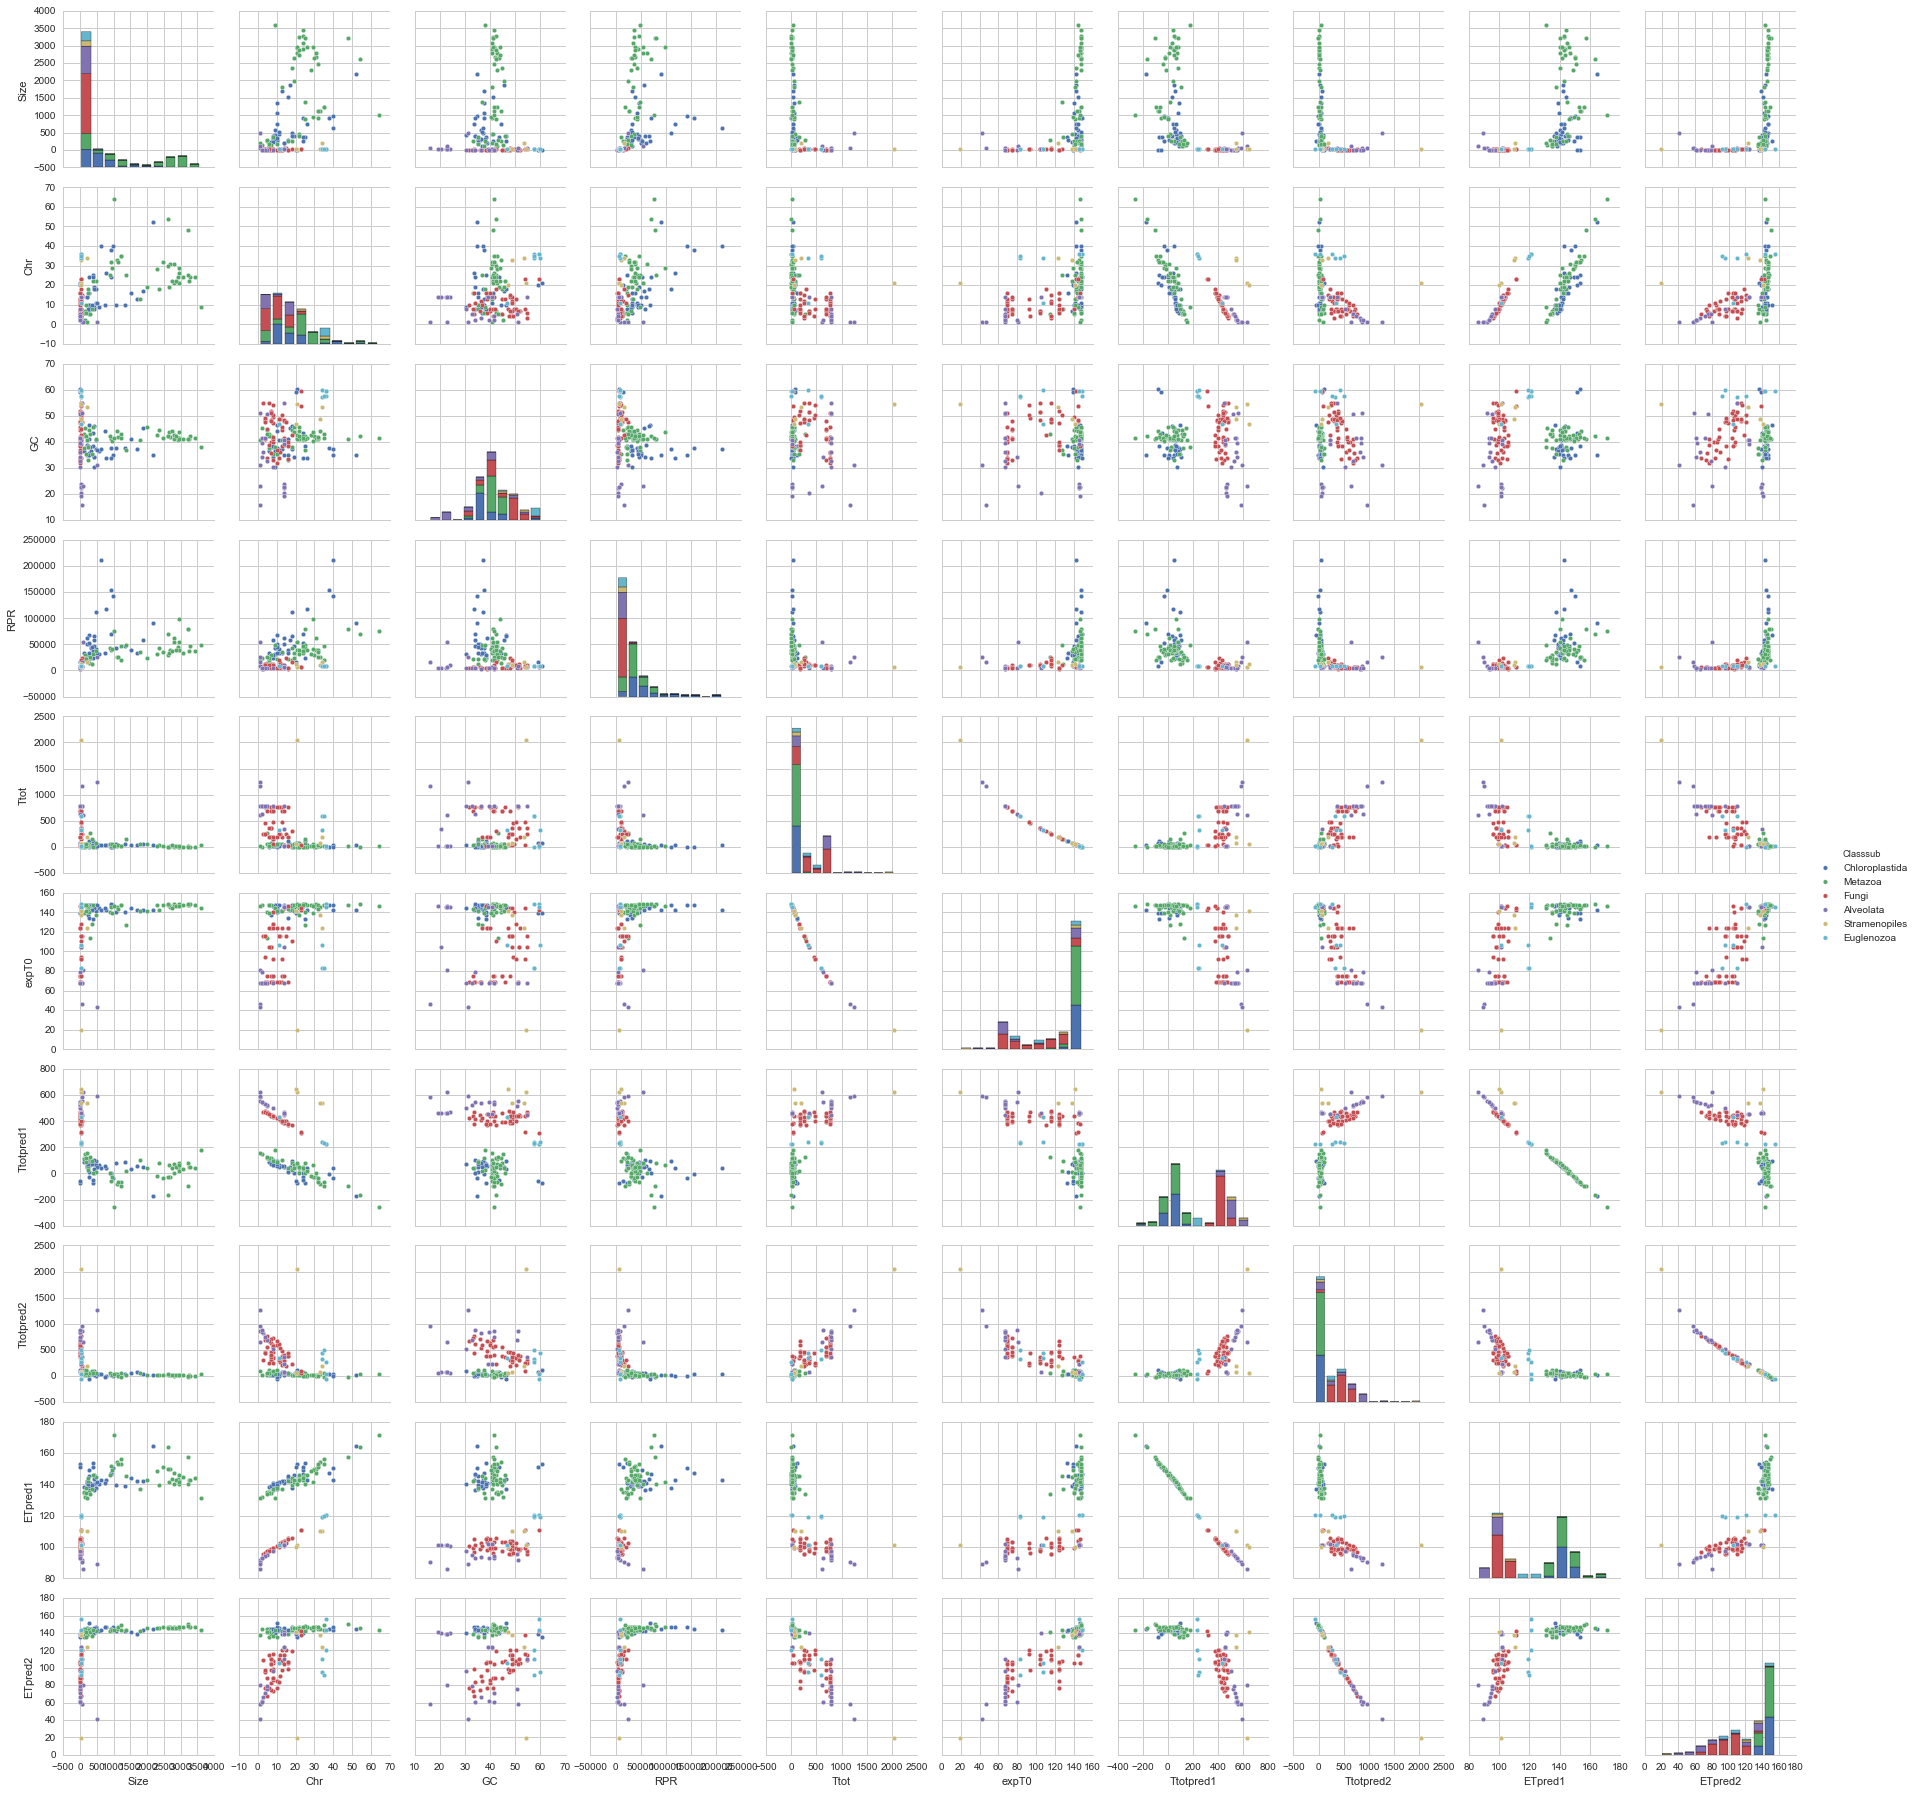

In [163]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df_sub1_EP3B_[[c for c in df_sub1_EP3B_.columns if c not in ['Organism','Kingdom','Classes', 'Classsub0', 'Classsub1']]], hue='Classsub')

In [145]:
df_sub1_EP3B_.head(5)

Organism    Kingdom      Size   Chr       GC      RPR  \
0        Ananas comosus  Eukaryota   381.896  25.0  38.5375  23598.0   
1   Anolis carolinensis  Eukaryota  1799.140  13.0  40.8238  34827.0   
2     Anopheles gambiae  Eukaryota   265.027   5.0  44.5000  14099.0   
3        Apis mellifera  Eukaryota   250.287  16.0  33.1169  22456.0   
4  Arabidopsis thaliana  Eukaryota   119.668   6.0  36.6000  33107.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   
1  [, Anolis carolinensis, Anolis, Polychrotinae,...   48.0  141.457596   
2  [, Anopheles gambiae, gambiae species complex,...   57.0  140.190190   
3  [, Apis mellifera, Apis, Apini, Apinae, Apidae...   33.0  143.595454   
4  [, Arabidopsis thaliana, Arabidopsis, Cameline...    5.0  147.672945   

         Classsub                                          Classsub1  \
0  Chloroplastida  [Poales, commelinids, Petrosaviidae, Liliopsid...   
1         Metazoa  [Sauria, Sauropsida, Amniota, Tetrapoda, Dipno...   
2         Metazoa  [Diptera, Endopterygota, Neoptera, Pterygota, ...   
3         Metazoa  [Apidae, Apoidea, Aculeata, Apocrita, Hymenopt...   
4  Chloroplastida  [Camelineae, Brassicaceae, Brassicales, malvid...   

   Classsub0   Ttotpred1   Ttotpred2  
0         64  -70.341051  153.487721  
1         50  100.810562  137.378286  
2         54  114.717797  135.039341  
3         34   45.013875  142.092832  
4         30   87.322776  138.155999

In [158]:
# Target is now Ttot - 
# Linear Regression
# 2** effects

import numpy as np

# Logistic Regression on Kingdom for Classification Eukaryotes
class_p = 'Classsub'
df_C1 = df_sub1_EP3B_[["Size","Chr","GC", "RPR", class_p, "Ttot"]] #Include target
Y =df_sub1_EP3B_["Ttot"] #target

#With Interactions
formula_c =  ' Ttot ~ (Size + Chr + GC + RPR + C(Classsub))**2 - 1' 
#formula_c = class_p + ' ~ (Size + Chr + GC + RPR + Ttot)**2 - 1' #CONCATENATE AUTOMATICALLY


formula_c = str(formula_c)

from patsy import dmatrices

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

from sklearn.linear_model import LinearRegression #LINEAR REGRESSION
from sklearn.metrics import accuracy_score

###NORMALIZE THE PREDICTOR VARIABLES!

Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

Xb_mat = Xb

logreg = LinearRegression()

#fit a model on the training data and test on the testing data
model = logreg.fit(Xb_mat, Yb)
# print model
predictions = logreg.predict(Xb_mat)

# print "Score:", model.score(Xb_mat, Yb)     
#print accuracy_score(Yb, predictions) ###ERRORS, why? 

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape

print "Model fit:", logreg.score(Xb_mat, Yb)
print logreg.intercept_, logreg.coef_[0]

house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": t.ravel()})

#house_coefs = pd.DataFrame(t, columns=Xb.columns)
#house_coefs['class'] = np.arange(house_coefs.shape[0])

print house_coefs #Strong Pos Correlation to Sex, and Strong Neg Correlation to Age

# Kiefer note: R2 is for regressions, not classification
from sklearn.metrics import r2_score

print r2_score(Yb, predictions)

df_sub1_EP3B_["Ttotpred2"] = predictions

(1, 36)
(163, 36)
Model fit: 0.825984476401
[ 1524300.02814478] [ -1.52309389e+06  -1.52369346e+06  -1.51096127e+06  -1.52236831e+06
  -1.52356229e+06  -3.84659471e+02   1.09418686e+00  -9.95456581e-01
   2.55507639e+02  -4.53652919e+00  -1.04654720e+00   2.06438846e+03
  -9.18031016e+01   5.50950812e+01  -1.61388544e+02   2.54000744e+01
   4.81163118e+01   5.02948210e+02  -5.39482737e+00  -1.05464674e+01
   1.60079237e-01  -2.20444475e+01  -1.14931696e+01  -2.40741343e+04
  -8.22902415e-03   9.27306372e-03  -1.73341069e+00   1.27449912e-02
   1.15019966e-02  -4.03014706e+01   7.50108448e-04  -1.08351763e-03
  -8.76255273e-07   9.72793855e-01   1.20165192e-05  -2.65221156e-05]
            coef                             feature
0  -1.523094e+06              C(Classsub)[Alveolata]
1  -1.523693e+06         C(Classsub)[Chloroplastida]
2  -1.510961e+06             C(Classsub)[Euglenozoa]
3  -1.522368e+06                  C(Classsub)[Fungi]
4  -1.523562e+06                C(Classsub)[Metaz

In [250]:
# Target is now Ttot - 
# Linear Regression
# 2** effects

import numpy as np

# Logistic Regression on Kingdom for Classification Eukaryotes
class_p = 'Classsub'
df_C1 = df_sub1_EP3B_[["Size","Chr","GC", "RPR", class_p, "Ttot"]] #Include target
Y =df_sub1_EP3B_["Ttot"] #target

#With Interactions
formula_c =  ' Ttot ~ (Size + Chr + GC + RPR + C(Classsub))**2 - 1' 
#formula_c = class_p + ' ~ (Size + Chr + GC + RPR + Ttot)**2 - 1' #CONCATENATE AUTOMATICALLY


formula_c = str(formula_c)

from patsy import dmatrices

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

from sklearn.linear_model import LinearRegression #LINEAR REGRESSION
from sklearn.metrics import accuracy_score

###NORMALIZE THE PREDICTOR VARIABLES!

Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

Xb_mat = Xb

logreg = LinearRegression()
# Better estimate of training accuracy of out of sample performance
X_train, X_test, Y_train, Y_test = train_test_split(Xb, Yb, test_size=0.3, random_state=42)
# X_train = Xb
# Y_train = Yb
# X_test = Xb
# Y_test = Yb


#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, Y_train)
# print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, Y_test)     
#print accuracy_score(Y_test, predictions) ###ERRORS, why? 

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape

print "Model fit:", logreg.score(X_test, Y_test)
print logreg.intercept_, logreg.coef_[0]

house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": t.ravel()})

#house_coefs = pd.DataFrame(t, columns=Xb.columns)
#house_coefs['class'] = np.arange(house_coefs.shape[0])

print house_coefs #Strong Pos Correlation to Sex, and Strong Neg Correlation to Age

# print type(predictions)
# print type(Y_test)
print predictions

df_CHECK1 = pd.DataFrame()
df_CHECK1['preds'] = np.ravel(predictions)
df_CHECK1['ytest'] = Y_test['Ttot'].tolist()

df_CHECK1

Score: -1593753865.38
(1, 36)
(163, 36)
Model fit: -1593753865.38
[-35270354.38982139] [  3.52715725e+07   3.52708180e+07   8.02930402e+05   3.52725685e+07
   3.52710169e+07   8.11043980e+03   1.04543962e+00  -8.91050099e-01
  -5.25735901e+06  -7.99534256e-01  -9.67149740e-01  -5.81383080e+04
  -9.09644957e+01   5.83437846e+01   2.27461361e+04   3.97204633e+01
   5.01610336e+01   1.51275655e+05  -3.88995592e+00  -9.12237908e+00
   2.12134560e+05  -3.12859806e+01  -1.18830453e+01   5.09679296e+05
  -8.75351418e-03   1.08065519e-02   2.32995848e+04   2.72286433e-03
   1.47256752e-02   8.75302827e+02   1.17701066e-03  -1.50355178e-03
  -1.63086618e-06   8.63902478e-01   7.85498099e-06  -3.50074539e-05]
            coef                             feature
0   3.527157e+07              C(Classsub)[Alveolata]
1   3.527082e+07         C(Classsub)[Chloroplastida]
2   8.029304e+05             C(Classsub)[Euglenozoa]
3   3.527257e+07                  C(Classsub)[Fungi]
4   3.527102e+07          

preds  ytest
0   3.312933e+02  764.0
1   3.742665e+01   15.0
2   1.725772e+01   13.0
3   1.711300e+01    4.0
4   2.922775e+02  352.0
5   2.450517e+01   43.0
6   1.934559e+02  352.0
7   3.141541e+02  182.0
8   3.599977e+02  352.0
9  -4.146496e+01    8.0
10  3.978417e+01    5.0
11  1.364772e+01    6.0
12  1.233782e+01   17.0
13  1.006165e+02   40.0
14  8.782861e+02  764.0
15  2.916002e+01    9.0
16  5.403492e+02  182.0
17  1.630662e+01   26.0
18  7.368407e+02  789.0
19  3.445365e+02  296.0
20  6.694425e+02  764.0
21  2.719897e+01    5.0
22  8.695054e+02  789.0
23  3.088091e+02  150.0
24  2.132900e+01   18.0
25  9.305370e+02  629.0
26  6.860452e+02  182.0
27  1.226822e+01   18.0
28  5.035481e+02  182.0
29  7.518589e+07  327.0
30  1.981462e+01  104.0
31 -4.902733e+06    1.0
32  2.074075e+02  246.0
33  1.927697e+01    6.0
34  1.006235e+01   57.0
35  9.580175e+00   51.0
36  1.053434e+02   10.0
37  1.017882e+02    9.0
38 -3.330908e+01    9.0
39  9.083741e+02  789.0
40  5.875240e+02  182.0
41  3.283469e+01    2.0
42  2.136557e+06   75.0
43  1.967932e+01   10.0
44  5.373579e+02   14.0
45  4.449264e+02  685.0
46 -2.304029e+06  582.0
47  1.638245e+01    5.0
48  2.392041e+02   19.0

In [251]:
### Target is now Etot - 
### Linear Regression ### TRY WITH Cross effects

import numpy as np

# Logistic Regression on Kingdom for Classification Eukaryotes
class_p = 'Classsub'
df_C1 = df_sub1_EP3B_[["Size","Chr","GC", "RPR", class_p, "expT0"]] #Include target
Y =df_sub1_EP3B_["expT0"] #target

#Patsy
# Use some string adding and joining to make the simple model formula:
#formula_c =  ' expT0 ~ Size + Chr + GC + RPR + C(Classsub) - 1' 
formula_c = ' expT0 ~ (Size + Chr + GC + RPR + C(Classsub))**2 - 1' #CONCATENATE AUTOMATICALLY

formula_c = str(formula_c)

from patsy import dmatrices
from sklearn.cross_validation import train_test_split

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

from sklearn.linear_model import LinearRegression #LINEAR REGRESSION
from sklearn.metrics import accuracy_score



###NORMALIZE THE PREDICTOR VARIABLES!

Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

Xb_mat = Xb



# Better estimate of training accuracy of out of sample performance
X_train, X_test, Y_train, Y_test = train_test_split(Xb, Yb, test_size=0.3, random_state=42)
X_train = Xb
X_test = Xb
Y_train = Yb
Y_test = Yb


logreg = LinearRegression()

#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, Y_train)
# print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, Y_test)     
#print accuracy_score(Y_test, predictions) ###ERRORS, why? 

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape

print "Model fit:", logreg.score(X_test, Y_test)
print logreg.intercept_, logreg.coef_[0]

house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": t.ravel()})

#house_coefs = pd.DataFrame(t, columns=Xb.columns)
#house_coefs['class'] = np.arange(house_coefs.shape[0])

print house_coefs #Strong Pos Correlation to Sex, and Strong Neg Correlation to Age

print len(predictions)
print len(Yb)

df_sub1_EP3B_["ETpred2"] = predictions

Score: 0.801326968768
(1, 36)
(163, 36)
Model fit: 0.801326968768
[ 12570.74569748] [ -1.25294983e+04  -1.24695880e+04  -1.38489367e+04  -1.26065928e+04
  -1.24915739e+04  -3.22676358e+00  -5.97546716e-02   5.31682919e-02
  -2.97321809e+01   3.04189194e-01   5.84341053e-02   1.63573840e+01
   8.22144110e+00  -5.40324192e+00   1.99059286e+01  -2.48641570e+00
  -4.75583750e+00   1.67389440e+00   1.80067217e-01   9.81088053e-01
  -1.88573940e+00   2.28061155e+00   1.34331802e+00  -2.02082990e+02
   5.32316938e-04  -6.47226583e-04   1.99208673e-01  -1.04316477e-03
  -9.04493303e-04  -3.10142306e-01  -4.40897881e-05   1.95902851e-05
   8.69648285e-08  -7.51751635e-02  -1.92062375e-06   4.06610467e-06]
            coef                             feature
0  -1.252950e+04              C(Classsub)[Alveolata]
1  -1.246959e+04         C(Classsub)[Chloroplastida]
2  -1.384894e+04             C(Classsub)[Euglenozoa]
3  -1.260659e+04                  C(Classsub)[Fungi]
4  -1.249157e+04             

In [272]:
### Target is now Etot - 
### Linear Regression ### NO Cross effects

import numpy as np

# Logistic Regression on Kingdom for Classification Eukaryotes
class_p = 'Classsub'
df_C1 = df_sub1_EP3B_[["Size","Chr","GC", "RPR", class_p, "expT0"]] #Include target
Y =df_sub1_EP3B_["expT0"] #target

#Patsy
# Use some string adding and joining to make the simple model formula:
formula_c =  ' expT0 ~ Size + Chr + GC + RPR + C(Classsub) - 1' 
#formula_c = ' expT0 ~ (Size + Chr + GC + RPR + C(Classsub))**2 - 1' #CONCATENATE AUTOMATICALLY

formula_c = str(formula_c)

from patsy import dmatrices
from sklearn.cross_validation import train_test_split

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')

from sklearn.linear_model import LinearRegression #LINEAR REGRESSION
from sklearn.metrics import accuracy_score



###NORMALIZE THE PREDICTOR VARIABLES!

Xb_mat = ((Xb - Xb.mean())/ Xb.std()).values

Xb_mat = Xb

# Not enough bias, too much variance in this data set....

logreg = LinearRegression()
# Better estimate of training accuracy of out of sample performance
X_train, X_test, Y_train, Y_test = train_test_split(Xb, Yb, test_size=0.3, random_state=42)
# X_train = Xb
# Y_train = Yb
# X_test = Xb
# Y_test = Yb


#fit a model on the training data and test on the testing data
model = logreg.fit(X_train, Y_train)
# print model
predictions = logreg.predict(X_test)

print "Score:", model.score(X_test, Y_test)     
#print accuracy_score(Y_test, predictions) ###ERRORS, why? 

t = logreg.coef_
#tt = t.reshape(-1)

print t.shape
print Xb.shape

print "Model fit:", logreg.score(X_test, Y_test)
print logreg.intercept_, logreg.coef_[0]

house_coefs = pd.DataFrame({'feature': Xb.columns, "coef": t.ravel()})

#house_coefs = pd.DataFrame(t, columns=Xb.columns)
#house_coefs['class'] = np.arange(house_coefs.shape[0])

print house_coefs 

# print type(predictions)
print Y_test
#print predictions

df_CHECK1 = pd.DataFrame()
df_CHECK1['preds'] = np.ravel(predictions)
df_CHECK1['ytest'] = Y_test['expT0'].tolist()

df_CHECK1

Score: 0.51427653542
(1, 10)
(163, 10)
Model fit: 0.51427653542
[ 101.33152132] [ -8.68481983e+00   3.36050561e+01  -1.19673773e+01  -1.31382766e+01
   2.89335387e+01  -2.87481210e+01  -1.28081332e-03   8.69278123e-01
   3.79326430e-02  -1.30057409e-04]
        coef                      feature
0  -8.684820       C(Classsub)[Alveolata]
1  33.605056  C(Classsub)[Chloroplastida]
2 -11.967377      C(Classsub)[Euglenozoa]
3 -13.138277           C(Classsub)[Fungi]
4  28.933539         C(Classsub)[Metazoa]
5 -28.748121   C(Classsub)[Stramenopiles]
6  -0.001281                         Size
7   0.869278                          Chr
8   0.037933                           GC
9  -0.000130                          RPR
          expT0
166   69.130775
145  146.203575
162  146.496275
69   147.820692
114  104.376025
34   142.166656
191  104.376025
65   123.717408
121  104.376025
180  147.230590
20   147.672945
103  147.525346
16   145.911460
81   142.593796
26    69.130775
35   147.083433
163  123.717

preds       ytest
0    95.624583   69.130775
1   176.236156  146.203575
2   142.283621  146.496275
3   140.733535  147.820692
4    94.996776  104.376025
5   139.037404  142.166656
6    94.162844  104.376025
7    95.606169  123.717408
8    94.586430  104.376025
9   158.154833  147.230590
10  136.917740  147.672945
11  142.049047  147.525346
12  150.302127  145.911460
13  141.115078  142.593796
14   92.966427   69.130775
15  138.040237  147.083433
16  103.084653  123.717408
17  142.668558  144.604149
18   97.576204   67.423930
19  103.270813  110.387842
20   92.563959   69.130775
21  148.055162  147.672945
22   96.169143   67.423930
23   95.712688  127.740390
24  153.362863  145.765622
25   95.137672   79.122715
26   97.541358  123.717408
27  155.757426  145.765622
28  102.903554  123.717408
29   99.467712  107.018316
30  145.520629  133.753693
31  121.749996  148.264820
32   99.745580  116.047548
33  141.101106  147.525346
34  134.126324  140.190190
35  140.010940  141.033860
36  129.741895  146.936423
37  133.805072  147.083433
38  159.141254  147.083433
39   95.174358   67.423930
40  100.253863  123.717408
41  146.780677  148.116629
42  101.733533  137.689342
43  139.502617  146.936423
44  102.837992  146.349852
45  100.509414   74.813623
46  120.920890   82.930259
47  143.191769  147.672945
48  105.480300  145.619929

In [217]:
###########PREP FOR DECISION TREE ############
### Target 

import numpy as np

# Logistic Regression on Kingdom for Classification Eukaryotes
class_p = 'Classsub'
df_C1 = df_sub1_EP3B_[["Size","Chr","GC", "RPR", class_p, "Ttot"]] #Include target
Y =df_sub1_EP3B_["Ttot"] #target

#Patsy

formula_c =  ' Ttot ~ Size + Chr + GC + RPR + C(Classsub) - 1' 
#formula_c =  ' Ttot ~ (Size + Chr + GC + RPR + C(Classsub))**2 - 1' 



formula_c = str(formula_c)

from patsy import dmatrices

Yb, Xb = dmatrices(formula_c, data = df_C1, return_type='dataframe')
Xb[0:1].T

0
C(Classsub)[Alveolata]           0.0000
C(Classsub)[Chloroplastida]      1.0000
C(Classsub)[Euglenozoa]          0.0000
C(Classsub)[Fungi]               0.0000
C(Classsub)[Metazoa]             0.0000
C(Classsub)[Stramenopiles]       0.0000
Size                           381.8960
Chr                             25.0000
GC                              38.5375
RPR                          23598.0000

R2:  1.0
Best score: 267.204521631
Best depth: 2


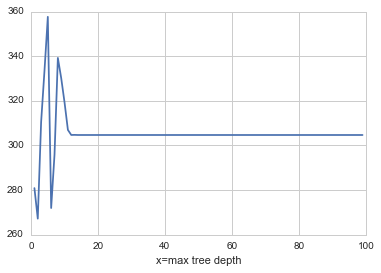

In [218]:
# DECISION TREE MODELING: 1.2 CART-solution-code

x = Xb #df_C1.drop('Ttot', axis = 1)
y = Yb #df_C1['Ttot']

# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
X_train = x
X_test = x
y_train = y
y_test = y
y_test2 = y_test['Ttot'].values
##y_test2 = y_test

# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=42, max_depth=20)
treereg.fit(X_train, y_train)


# make predictions
preds = treereg.predict(X_test)

# Kiefer note: R2 is for regressions, not classification
from sklearn.metrics import r2_score


print "R2: ", r2_score(y_test2, preds)

# use cross-validation to find best max_depth
from sklearn.cross_validation import cross_val_score

all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 100):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    # Kiefer note: mean squared error is for regression, not classification
    scores = cross_val_score(treereg, X_train, y_train, cv=4, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
treereg.fit(X_train, y_train)
preds = treereg.predict(X_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(range(1, 100), all_scores)
plt.xlabel('x=max tree depth')


In [219]:
r2_score(y_test2, preds)

0.83173802531449459

In [220]:
pd_CHECK = pd.DataFrame()

pd_CHECK['Y_TEST'] = y_test2
pd_CHECK['predicted'] = preds

pd_CHECK

Y_TEST   predicted
0     109.0   26.402597
1      48.0   26.402597
2      57.0   57.000000
3      33.0   26.402597
4       5.0   26.402597
5      13.0   26.402597
6      58.0   26.402597
7      58.0   26.402597
8      55.0  336.894737
9     150.0  336.894737
10    789.0  789.000000
11    789.0  675.960000
12    789.0  675.960000
13     28.0   26.402597
14     22.0   26.402597
15     17.0   26.402597
16    296.0  443.666667
17     13.0   26.402597
18      5.0   26.402597
19      5.0   26.402597
20      5.0   26.402597
21     60.0   26.402597
22      5.0   26.402597
23     42.0   26.402597
24    764.0  675.960000
25    685.0  675.960000
26    182.0  675.960000
27      6.0   26.402597
28      3.0   26.402597
29     43.0   26.402597
..      ...         ...
133    14.0  123.160000
134   182.0  376.000000
135   764.0  336.894737
136    11.0   26.402597
137   685.0  675.960000
138   144.0  163.500000
139   104.0   26.402597
140    29.0   26.402597
141     2.0   26.402597
142    29.0   26.402597
143    41.0  123.160000
144   685.0  675.960000
145     8.0   26.402597
146     6.0   26.402597
147   610.0  675.960000
148   764.0  675.960000
149   764.0  376.000000
150    51.0  123.160000
151   789.0  675.960000
152   789.0  675.960000
153   789.0  675.960000
154   629.0  675.960000
155    40.0   26.402597
156   352.0  336.894737
157   764.0  675.960000
158    48.0   26.402597
159   327.0  336.894737
160    31.0  123.160000
161   480.0  336.894737
162   480.0  336.894737

[163 rows x 2 columns]

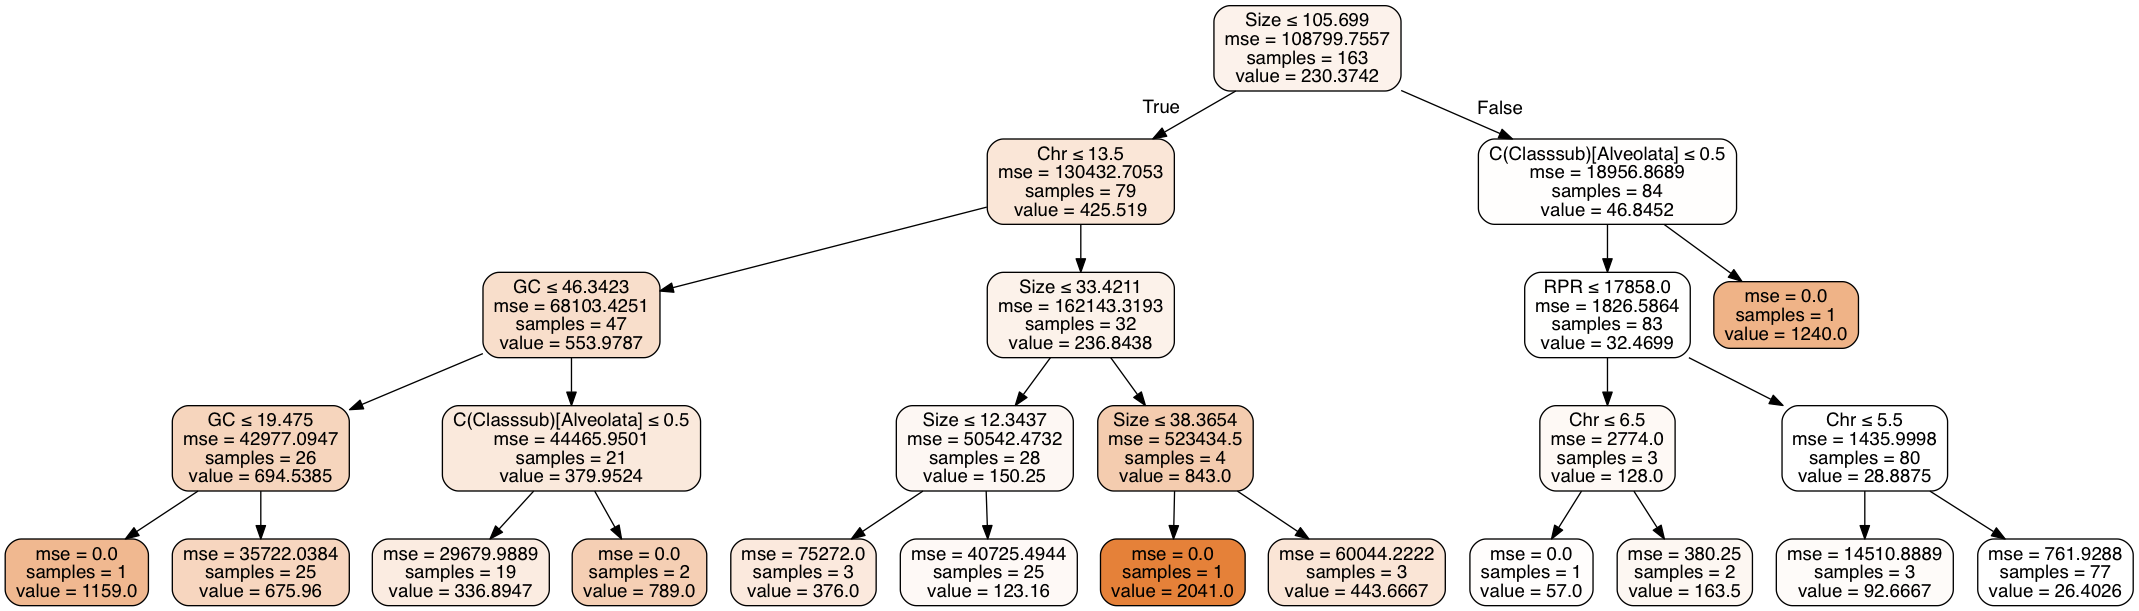

In [221]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()  
export_graphviz(treereg, out_file=dot_data,  
                feature_names=x.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

### ORANGE IS EUKARYOTA - only 80 samples are Eukaryota
### IF Size > 12 & GC < 64% then Eukaryota
### IF Size > 2 & Chromosomes > 6 then Eukaryota, But one Eukaryota with Chr 3 false negative

In [170]:
###LET's TRY TO INFER PREDICTOR CHARACTERISTICS BASED ON TIME... BUT EXTINCTION TIME EVENTS/IMPACT DATA

url = 'http://timetreebeta.igem.temple.edu/ajax/timeline/Homo%20sapiens?taxon=Homo+sapiens&selected=Homo+sapiens'

import requests
r = requests.get(url)
r.text

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

soup = BeautifulSoup(r.text)

df_meteors = pd.DataFrame()
list_Name = []
list_Diam = []
list_Age = []

for circle in soup.find_all('circle'):
    print circle
    try:
        list_Name.append(circle['name'])
        list_Age.append(circle['age'])
        list_Diam.append(circle['diam'])
    except:
        pass
    
df_meteors['MYA'] = list_Age
df_meteors['Name'] = list_Name
df_meteors['Diam'] = list_Diam

df_meteors.head(5)

df_meteors['MYA'] = df_meteors['MYA'].map(lambda x: float(x))
df_meteors['Diam'] = df_meteors['Diam'].map(lambda x: float(x))

df_meteors.sort(['MYA'], ascending = [True], inplace = True)
df_meteors.tail(5)

<circle age="2023" cx="26" cy="684" diam="160.00" fill="red" fill-opacity="0.4" lat="-27.000" loc="South Africa" lon="27.500" name="Vredefort" r="24" stroke="red" stroke-width="1"></circle>
<circle age="65" cx="26" cy="80" diam="150.00" fill="red" fill-opacity="0.4" lat="21.333" loc="Yucatan, Mexico" lon="-89.500" name="Chicxulub" r="22" stroke="red" stroke-width="1"></circle>
<circle age="1850" cx="26" cy="676" diam="130.00" fill="red" fill-opacity="0.4" lat="46.600" loc="Ontario, Canada" lon="-81.183" name="Sudbury" r="20" stroke="red" stroke-width="1"></circle>
<circle age="36" cx="26" cy="49" diam="90.00" fill="red" fill-opacity="0.4" lat="71.650" loc="Russia" lon="111.183" name="Popigai" r="14" stroke="red" stroke-width="1"></circle>
<circle age="590" cx="26" cy="622" diam="90.00" fill="red" fill-opacity="0.4" lat="-32.017" loc="South Australia" lon="135.450" name="Acraman" r="14" stroke="red" stroke-width="1"></circle>
<circle age="214" cx="26" cy="241" diam="85.00" fill="red" fi

/Users/noriogura/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


MYA        Name   Diam
2   1850.0     Sudbury  130.0
68  1900.0       Dhala   11.0
23  2000.0  Yarrabubba   30.0
0   2023.0   Vredefort  160.0
50  2400.0   Suavjarvi   16.0

In [171]:
len(df_meteors)

187

In [189]:
df_BIG = df_meteors[df_meteors['Diam']>50]
df_BIG.sort_values(['MYA'], ascending=True)
df_BIG=df_BIG.reset_index(drop=True)
df_BIG

MYA         Name   Diam
0      5.0     Kara-Kul   52.0
1     36.0      Popigai   90.0
2     65.0    Chicxulub  150.0
3     70.0         Kara   65.0
4    128.0   Tookoonoka   55.0
5    145.0    Morokweng   70.0
6    214.0  Manicouagan   85.0
7    342.0   Charlevoix   54.0
8    377.0       Siljan   52.0
9    590.0      Acraman   90.0
10   600.0   Beaverhead   60.0
11  1850.0      Sudbury  130.0
12  2023.0    Vredefort  160.0

In [190]:
df_BIG.ix[0]['Diam']

52.0

In [173]:
df_sub1_EP3B_.head(1)

Organism    Kingdom     Size   Chr       GC      RPR  \
0  Ananas comosus  Eukaryota  381.896  25.0  38.5375  23598.0   

                                             Classes   Ttot       expT0  \
0  [, Ananas comosus, Ananas, Bromeliaceae, Poale...  109.0  133.086594   

         Classsub                                          Classsub1  \
0  Chloroplastida  [Poales, commelinids, Petrosaviidae, Liliopsid...   

   Classsub0  Ttotpred1  Ttotpred2     ETpred1     ETpred2  
0         64 -70.341051  40.389943  153.487721  141.922993

In [175]:
# df_sub1_EP3C_ = df_sub1_EP3B_
# df_sub1_EP3C_[['Ttot']] = df_sub1_EP3B_[['Ttot']]

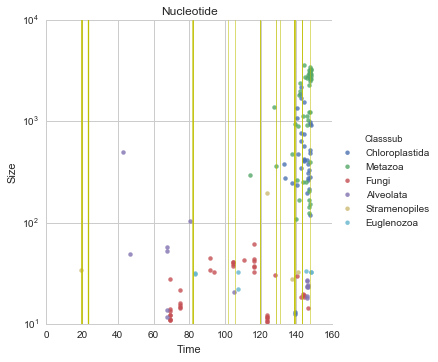

In [198]:
df = df_sub1_EP3B_[['Chr','GC','RPR','Size','expT0','Classsub']]
#df = df[df["Classsub"] =='Chloroplastida' | df["Classsub"] =='Metazoa']]
#df_subO_fixT['expT0'] = np.exp((5000 - df_subO_fixT['Ttot'])/1000) #get it in reasonable scale

grid=sns.lmplot('expT0', 'Size', 
           data=df, 
           fit_reg=False, 
           hue='Classsub')

plt.title('Nucleotide')
plt.xlabel('Time')
plt.ylabel('Size')

plt.axvline(x= np.exp((5000 - df_BIG.ix[0]['MYA'])/1000), linewidth=df_BIG.ix[0]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[1]['MYA'])/1000), linewidth=df_BIG.ix[1]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[2]['MYA'])/1000), linewidth=df_BIG.ix[2]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[3]['MYA'])/1000), linewidth=df_BIG.ix[3]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[4]['MYA'])/1000), linewidth=df_BIG.ix[4]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[5]['MYA'])/1000), linewidth=df_BIG.ix[5]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[6]['MYA'])/1000), linewidth=df_BIG.ix[6]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[7]['MYA'])/1000), linewidth=df_BIG.ix[7]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[8]['MYA'])/1000), linewidth=df_BIG.ix[8]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[9]['MYA'])/1000), linewidth=df_BIG.ix[9]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[10]['MYA'])/1000), linewidth=df_BIG.ix[10]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[11]['MYA'])/1000), linewidth=df_BIG.ix[11]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[12]['MYA'])/1000), linewidth=df_BIG.ix[12]['Diam']*.01, color='y')
grid.set(yscale='log')

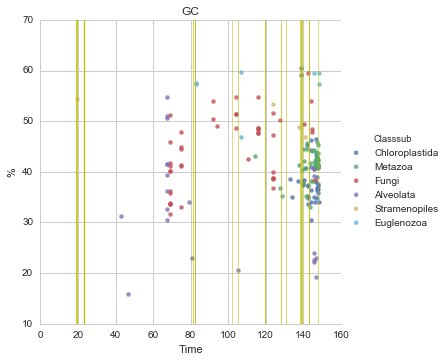

In [199]:
df = df_sub1_EP3B_[['Chr','GC','RPR','Size','expT0','Classsub']]
#df = df[df["Classsub"] =='Chloroplastida' | df["Classsub"] =='Metazoa']]

grid=sns.lmplot('expT0', 'GC', 
           data=df, 
           fit_reg=False, 
           hue='Classsub')

plt.title('GC')
plt.xlabel('Time')
plt.ylabel('%')

plt.axvline(x= np.exp((5000 - df_BIG.ix[0]['MYA'])/1000), linewidth=df_BIG.ix[0]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[1]['MYA'])/1000), linewidth=df_BIG.ix[1]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[2]['MYA'])/1000), linewidth=df_BIG.ix[2]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[3]['MYA'])/1000), linewidth=df_BIG.ix[3]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[4]['MYA'])/1000), linewidth=df_BIG.ix[4]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[5]['MYA'])/1000), linewidth=df_BIG.ix[5]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[6]['MYA'])/1000), linewidth=df_BIG.ix[6]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[7]['MYA'])/1000), linewidth=df_BIG.ix[7]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[8]['MYA'])/1000), linewidth=df_BIG.ix[8]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[9]['MYA'])/1000), linewidth=df_BIG.ix[9]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[10]['MYA'])/1000), linewidth=df_BIG.ix[10]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[11]['MYA'])/1000), linewidth=df_BIG.ix[11]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[12]['MYA'])/1000), linewidth=df_BIG.ix[12]['Diam']*.01, color='y')
#grid.set(yscale='log')

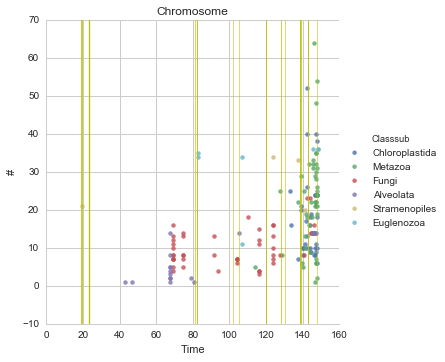

In [200]:
df = df_sub1_EP3B_[['Chr','GC','RPR','Size','expT0', 'Classsub']]
#df = df[df["Classsub"] =='Chloroplastida' | df["Classsub"] =='Metazoa']]

grid=sns.lmplot('expT0', 'Chr', 
           data=df, 
           fit_reg=False, 
           hue='Classsub')

plt.title('Chromosome')
plt.xlabel('Time')
plt.ylabel('#')

plt.axvline(x= np.exp((5000 - df_BIG.ix[0]['MYA'])/1000), linewidth=df_BIG.ix[0]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[1]['MYA'])/1000), linewidth=df_BIG.ix[1]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[2]['MYA'])/1000), linewidth=df_BIG.ix[2]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[3]['MYA'])/1000), linewidth=df_BIG.ix[3]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[4]['MYA'])/1000), linewidth=df_BIG.ix[4]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[5]['MYA'])/1000), linewidth=df_BIG.ix[5]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[6]['MYA'])/1000), linewidth=df_BIG.ix[6]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[7]['MYA'])/1000), linewidth=df_BIG.ix[7]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[8]['MYA'])/1000), linewidth=df_BIG.ix[8]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[9]['MYA'])/1000), linewidth=df_BIG.ix[9]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[10]['MYA'])/1000), linewidth=df_BIG.ix[10]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[11]['MYA'])/1000), linewidth=df_BIG.ix[11]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[12]['MYA'])/1000), linewidth=df_BIG.ix[12]['Diam']*.01, color='y')
#grid.set(yscale='log')

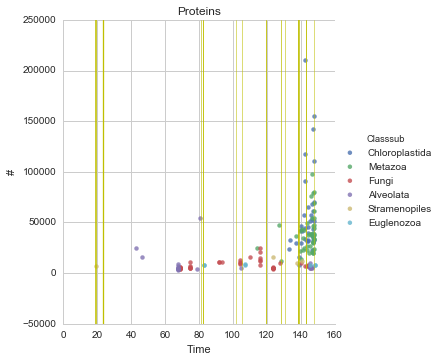

In [201]:
df = df_sub1_EP3B_[['Chr','GC','RPR','Size','expT0','Classsub']]
#df = df[df["Classsub"] =='Chloroplastida' | df["Classsub"] =='Metazoa']]
#fig, axs = plt.subplots(1,2)

# df['korisnika'].plot(ax=axs[0])
# df['osiguranika'].plot(ax=axs[1])

grid=sns.lmplot('expT0', 'RPR', 
           data=df, 
           fit_reg=False, 
           hue='Classsub')


plt.title('Proteins')
plt.xlabel('Time')
plt.ylabel('#')

plt.axvline(x= np.exp((5000 - df_BIG.ix[0]['MYA'])/1000), linewidth=df_BIG.ix[0]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[1]['MYA'])/1000), linewidth=df_BIG.ix[1]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[2]['MYA'])/1000), linewidth=df_BIG.ix[2]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[3]['MYA'])/1000), linewidth=df_BIG.ix[3]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[4]['MYA'])/1000), linewidth=df_BIG.ix[4]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[5]['MYA'])/1000), linewidth=df_BIG.ix[5]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[6]['MYA'])/1000), linewidth=df_BIG.ix[6]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[7]['MYA'])/1000), linewidth=df_BIG.ix[7]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[8]['MYA'])/1000), linewidth=df_BIG.ix[8]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[9]['MYA'])/1000), linewidth=df_BIG.ix[9]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[10]['MYA'])/1000), linewidth=df_BIG.ix[10]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[11]['MYA'])/1000), linewidth=df_BIG.ix[11]['Diam']*.01, color='y')
plt.axvline(x= np.exp((5000 - df_BIG.ix[12]['MYA'])/1000), linewidth=df_BIG.ix[12]['Diam']*.01, color='y')
#grid.set(yscale='log')